In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
import warnings
warnings.filterwarnings("ignore")

# DATA

In [2]:
daily_df= pd.read_csv(r"X:\Push to bdi-server\COVID-19 Project\COVID-19 Project\Dataset\daily_case_trends__the_united_states.csv",sep='\t')
total_df = pd.read_csv(r"X:\Push to bdi-server\COVID-19 Project\COVID-19 Project\Dataset\data_table_for_total_cases__the_united_states.csv",sep='delimiter')

In [3]:
# index data
index = pd.read_csv(r"X:\Push to bdi-server\COVID-19 Project\COVID-19 Project\Dataset\contentment_index.csv")
index

,Date,days,AK,AL,AR,AZ,CA,CO,CT,DC,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,14-03-2020,1.0,33.33,31.55,30.06,25.60,39.88,33.04,42.86,36.31,...,33.33,27.38,26.49,27.98,34.52,44.64,32.44,23.81,33.93,30.36
1,15-03-2020,2.0,33.33,31.55,30.06,29.17,39.88,37.20,42.86,36.31,...,37.50,30.95,26.49,31.55,34.52,44.64,32.44,27.38,37.50,33.93
2,16-03-2020,3.0,47.32,35.71,42.86,37.50,50.60,47.32,50.60,44.05,...,39.88,34.52,39.58,44.64,40.48,51.19,50.00,30.95,37.50,38.69
3,17-03-2020,4.0,52.68,44.35,50.00,38.69,60.12,47.32,51.79,44.05,...,39.88,40.48,43.15,44.64,40.48,53.57,54.76,44.05,37.50,43.15
4,18-03-2020,5.0,55.65,44.35,50.00,38.69,60.12,47.32,51.79,44.05,...,39.88,40.48,43.15,44.64,40.48,57.14,54.76,50.60,39.88,43.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,24-04-2021,407.0,59.88,48.21,55.95,56.55,60.77,62.56,61.07,67.02,...,48.27,51.19,60.71,45.24,56.55,72.02,65.83,62.86,60.12,56.25
407,25-04-2021,408.0,59.88,48.21,55.95,56.55,62.56,62.56,61.07,67.02,...,48.27,51.19,60.71,45.24,56.55,72.02,65.83,62.86,60.12,56.25
408,26-04-2021,409.0,59.88,48.21,55.95,56.55,62.56,62.56,61.07,67.02,...,48.27,51.19,60.71,45.24,56.55,72.02,65.83,62.86,60.12,56.25
409,27-04-2021,410.0,59.88,48.21,55.95,56.55,62.56,62.56,60.18,67.02,...,48.27,51.19,60.71,45.24,56.55,72.02,65.83,62.86,60.12,56.25


In [4]:
index.drop([410],axis=0,inplace=True)
index.iloc[:,2:] = (index.iloc[:,1:]/100).round(3)


In [5]:
index.iloc[:,1] = index.iloc[:,1].astype(int)

In [6]:
index.Date=pd.to_datetime(index.Date)

In [7]:
index["AL"].iloc[12]

0.631

In [8]:
data = pd.read_csv(r"X:\Push to bdi-server\COVID-19 Project\COVID-19 Project\Dataset\state_daily_cases\all_state_daily_cases.csv")

In [9]:
data[:410]

,Date,days,AL,Alaska,Arizona,Arkansas,CA,Colorado,Connectiut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin_Island,Virginia,Washington,West_virginia,Wyoming,Wisconsin
0,03-14-20,1,77,0,2,3,502,27,0,0,...,31,0,0,2,0,0,121,0,1,10
1,03-15-20,2,68,0,1,4,573,32,19,0,...,33,34,15,0,1,22,115,0,1,8
2,03-16-20,3,113,0,5,1,503,35,15,4,...,33,0,8,4,1,16,117,0,0,26
3,03-17-20,4,124,2,0,7,600,34,27,0,...,90,7,0,2,0,1,125,1,8,35
4,03-18-20,5,137,5,9,13,860,30,28,1,...,144,19,11,2,1,26,168,1,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,04-23-21,406,398,142,896,236,2150,1900,1034,401,...,1152,3472,344,81,12,1004,1749,405,83,900
406,04-24-21,407,280,136,729,184,1965,1861,722,164,...,911,2449,472,65,3,884,1648,375,41,651
407,04-25-21,408,286,200,661,64,1972,1714,722,292,...,524,1407,281,95,3,719,1146,314,41,465
408,04-26-21,409,509,83,750,63,1460,996,723,280,...,558,1918,246,32,4,1105,1076,289,40,406


In [10]:
type(data.Date.iloc[0])

str

In [11]:
data[data.Date == '04-28-21']

,Date,days,AL,Alaska,Arizona,Arkansas,CA,Colorado,Connectiut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin_Island,Virginia,Washington,West_virginia,Wyoming,Wisconsin
410,04-28-21,411,484,184,603,291,2271,1822,621,333,...,1181,4269,518,46,5,1187,1490,453,116,824


In [12]:
index["AL"]

0      0.333
1      0.333
2      0.473
3      0.527
4      0.556
       ...  
405    0.599
406    0.599
407    0.599
408    0.599
409    0.599
Name: AL, Length: 410, dtype: float64

# Policies

## imposed Policies

### Restaurant closing dates

In [13]:
#Restaurant closing dates
AL_rest = "03-19-20"
AK_rest = "03-18-20"
AZ_rest = "03-21-20"
AR_rest = "03-20-20"
CA_rest = "03-16-20"
CO_rest = "03-17-20"
CT_rest = "03-16-20"
DE_rest = "03-16-20"
DC_rest = "03-16-20"
FL_rest = "04-03-20"
GA_rest = "04-03-20"
HI_rest = "03-17-20"
ID_rest = "03-25-20"
IL_rest = "03-16-20"
IN_rest = "03-16-20"
IA_rest = "03-17-20"
KS_rest = "03-30-20"
KY_rest = "03-16-20"
LA_rest = "03-17-20"
ME_rest = "03-18-20"
MD_rest = "03-16-20"
MA_rest = "03-17-20"
MI_rest = "03-16-20"
MN_rest = "03-17-20"
MS_rest = "04-03-20"
MO_rest = "03-23-20"
MT_rest = "03-20-20"
NE_rest = "04-03-20"
NV_rest = "03-21-20"
NH_rest = "03-16-20"
NJ_rest = "03-16-20"
NM_rest = "03-20-20"
NY_rest = "03-17-20"
NC_rest = "03-18-20"
ND_rest = "03-21-20"
OH_rest = "03-16-20"
OK_rest = "04-1/-0"
OR_rest = "03-18-20"
PA_rest = "03-18-20"
RI_rest = "03-18-20"
SC_rest = "03-19-20"
SD_rest = ""
TN_rest = "03-24-20"
TX_rest = "03-21-20"
UT_rest = "03-20-20"
VT_rest = "03-18-20"
VA_rest = "03-26-20"
WA_rest = "03-16-20"
WV_rest = "03-19-20"
WI_rest = "03-18-20"
WY_rest = "03-19-20"



### Business Closing (non-essential business)

In [14]:


# Business Closing (non-essential business)
AL_buss = "03-28-20"
AK_buss = "03-24-20"
AZ_buss = "03-31-20"
AR_buss = "04-06-20"
CA_buss = "03-19-20"
CO_buss = "03-19-20"
CT_buss = "03-23-20"
DE_buss = "03-24-20"
DC_buss = "03-25-20"
FL_buss = "04-03-20"
GA_buss = "04-03-20"
HI_buss = "03-25-20"
ID_buss = "03-25-20"
IL_buss = "03-21-20"
IN_buss = "03-25-20"
IA_buss = "03-26-20"
KS_buss = "03-30-20"
KY_buss = "03-26-20"
LA_buss = "03-23-20"
ME_buss = "03-25-20"
MD_buss = "03-23-20"
MA_buss = "03-24-20"
MI_buss = "03-24-20"
MN_buss = "03-28-20"
MS_buss = "04-03-20"
MO_buss = "04-03-20"
MT_buss = "03-28-20"
NE_buss = "04-09-20"
NV_buss = "03-21-20"
NH_buss = "03-28-20"
NJ_buss = "03-21-20"
NM_buss = "03-24-20"
NY_buss = "03-22-20"
NC_buss = "03-30-20"
ND_buss = "03-20-20"
OH_buss = "03-24-20"
OK_buss = "04-01-20"
OR_buss = "03-23-20"
PA_buss = "03-21-20"
RI_buss = "03-30-20"
SC_buss = "04-01-20"
SD_buss = ""
TN_buss = "04-01-20"
TX_buss = "04-02-20"
UT_buss = "03-27-20"
VT_buss = "03-25-20"
VA_buss = "03-25-20"
WA_buss = "03-25-20"
WV_buss = "03-24-20"
WI_buss = "03-25-20"
WY_buss = "03-19-20"


### Interstate Quarantine Travel

In [15]:



AL_Q =""
AK_Q =""
AZ_Q ="04-09-20"
AR_Q ="05-05-20"
CA_Q =""
CO_Q =""
CT_Q ="06-25-20"
DE_Q =""
DC_Q ="07-27-20"
FL_Q ="03-24-20"
GA_Q =""
HI_Q =""
ID_Q =""
IL_Q =""
IN_Q =""
IA_Q =""
KS_Q ="03-23-20"
KY_Q =""
LA_Q =""
ME_Q ="06-12-20"
MD_Q ="12-17-20"
MA_Q ="07-01-20"
MI_Q =""
MN_Q =""
MS_Q =""
MO_Q =""
MT_Q =""
NE_Q =""
NV_Q =""
NH_Q ="11-15-20"
NJ_Q =""
NM_Q ="09-04-20"
NY_Q ="06-25-20"
NC_Q =""
ND_Q ="03-28-20"
OH_Q =""
OK_Q ="03-29-20"
OR_Q =""
PA_Q =""
RI_Q ="03-26-20"
SC_Q ="03-27-20"
SD_Q =""
TN_Q =""
TX_Q ="03-26-20"
UT_Q =""
VT_Q ="06-08-20"
VA_Q =""
WA_Q =""
WV_Q ="03-31-20"
WI_Q =""
WY_Q =""

## Policy Lifted Records

### Stay At Home Lifted

In [16]:
AL_stay_lift = "04-30-2020"
AK_stay_lift = "04-24-2020"
AZ_stay_lift = "05-16-2020"
AR_stay_lift = ""
CA_stay_lift = "01-25-2021"
CO_stay_lift = "04-27-2020"
CT_stay_lift = "05-20-2020"
DE_stay_lift = "06-01-2020"
DC_stay_lift = "05-29-2020"
FL_stay_lift = "05-18-2020"
GA_stay_lift = "05-01-2020"
HI_stay_lift = "05-31-2020"
ID_stay_lift = "05-01-2020"
IL_stay_lift = "05-29-2020"
IN_stay_lift = "05-18-2020"
IA_stay_lift = ""
KS_stay_lift = "05-04-2020"
KY_stay_lift = "06-29-2020"
LA_stay_lift = "05-15-2020"
ME_stay_lift = "05-31-2020"
MD_stay_lift = "05-15-2020"
MA_stay_lift = "05-18-2020"
MI_stay_lift = "06-01-2020"
MN_stay_lift = "05-18-2020"
MS_stay_lift = "04-27-2020"
MO_stay_lift = "05-04-2020"
MT_stay_lift = "04-26-2020"
NE_stay_lift = "05-24-2021"
NV_stay_lift = "05-09-2020"
NH_stay_lift = "06-16-2020"
NJ_stay_lift = "06-09-2020"
NM_stay_lift = ""
NY_stay_lift = "06-27-2020"
NC_stay_lift = "05-22-2020"
ND_stay_lift = ""
OH_stay_lift = "05-20-2020"
OK_stay_lift = "05-15-2020"
OR_stay_lift = "06-19-2020"
PA_stay_lift = "06-05-2020"
RI_stay_lift = "05-09-2020"
SC_stay_lift = "05-04-2020"
SD_stay_lift = ""
TN_stay_lift = "04-29-2020"
TX_stay_lift = "05-01-2020"
UT_stay_lift = ""
VT_stay_lift = "05-15-2020"
VA_stay_lift = "05-29-2020"
WA_stay_lift = "06-01-2020"
WV_stay_lift = "05-05-2020"
WI_stay_lift = "05-13-2020"
WY_stay_lift = ""

### Face Mask Policy Lifted

In [17]:
AL_FM_lift ="04-09-2021"
AK_FM_lift ="05-22-2020"
AZ_FM_lift ="03-25-2021"
AR_FM_lift ="03-30-2021"
CA_FM_lift ="06-15-2021"
CO_FM_lift ="05-15-2021"
CT_FM_lift ="05-19-2021"
DE_FM_lift ="05-21-2021"
DC_FM_lift ="05-17-2021"
FL_FM_lift ="05-04-2021"
GA_FM_lift ="05-01-2021"
HI_FM_lift =""
ID_FM_lift =""
IL_FM_lift ="06-11-2021"
IN_FM_lift ="04-06-2021"
IA_FM_lift ="02-07-2021"
KS_FM_lift ="04-01-2021"
KY_FM_lift ="06-11-2021"
LA_FM_lift ="04-28-2021"
ME_FM_lift ="05-24-2021"
MD_FM_lift ="05-15-2021"
MA_FM_lift ="05-29-2021"
MI_FM_lift ="10-02-2020"
MN_FM_lift ="05-14-2021"
MS_FM_lift ="09-30-2020"
MO_FM_lift =""              # 05-07-2021 according to business closure.
MT_FM_lift ="02-12-2021"
NE_FM_lift =""              # 05-24-2021
NV_FM_lift ="05-13-2021"
NH_FM_lift ="04-16-2021"
NJ_FM_lift ="05-28-2021"
NM_FM_lift ="05-14-2021"
NY_FM_lift ="05-19-2021"
NC_FM_lift ="05-14-2021"
ND_FM_lift ="01-18-2021"
OH_FM_lift ="06-02-2021"
OK_FM_lift =""              # 07-01-2021
OR_FM_lift ="05-13-2021"
PA_FM_lift ="05-13-2021"
RI_FM_lift ="05-18-2021"
SC_FM_lift ="05-11-2021"
SD_FM_lift =""
TN_FM_lift =""              # 08-16-2021
TX_FM_lift ="03-10-2021"
UT_FM_lift ="05-01-2020"
VT_FM_lift ="06-14-2021"
VA_FM_lift ="05-15-2021"
WA_FM_lift ="05-13-2021"
WV_FM_lift ="06-20-2021"
WI_FM_lift ="03-31-2021"
WY_FM_lift ="03-16-2021"


### Inter-state Travel Ban

In [18]:
AL_travel_lift =""
AK_travel_lift ="02-14-2021"
AZ_travel_lift ="05-12-2020"
AR_travel_lift ="06-15-2020"
CA_travel_lift =""
CO_travel_lift =""
CT_travel_lift ="03-19-2021"
DE_travel_lift ="06-01-2020"
DC_travel_lift ="05-21-2021"
FL_travel_lift ="08-05-2020"
GA_travel_lift =""
HI_travel_lift =""
ID_travel_lift ="05-16-2020"
IL_travel_lift =""
IN_travel_lift =""
IA_travel_lift =""
KS_travel_lift =""
KY_travel_lift ="05-06-2020"
LA_travel_lift =""
ME_travel_lift ="05-01-2021"
MD_travel_lift ="03-12-2021"
MA_travel_lift ="03-22-2021"
MI_travel_lift =""
MN_travel_lift =""
MS_travel_lift =""
MO_travel_lift =""
MT_travel_lift ="06-01-2020"
NE_travel_lift =""
NV_travel_lift =""
NH_travel_lift ="03-11-2021"
NJ_travel_lift =""
NM_travel_lift ="02-11-2021"
NY_travel_lift =""
NC_travel_lift =""
ND_travel_lift ="09-21-2020"
OH_travel_lift =""
OK_travel_lift ="05-12-2020"
OR_travel_lift =""
PA_travel_lift ="03-01-2021"
RI_travel_lift =""
SC_travel_lift ="05-04-2020"
SD_travel_lift =""
TN_travel_lift =""
TX_travel_lift ="05-21-2020"
UT_travel_lift ="05-01-2020"
VT_travel_lift ="05-14-2021"
VA_travel_lift =""
WA_travel_lift =""
WV_travel_lift ="05-21-2020"
WI_travel_lift =""
WY_travel_lift ="05-08-2020"


### Reopening of Restaurants

In [19]:
AL_rest_lift ="05-11-2020"
AK_rest_lift ="04-24-2020"
AZ_rest_lift ="05-11-2020"
AR_rest_lift ="05-11-2020"
CA_rest_lift ="05-18-2020"
CO_rest_lift ="05-27-2020"
CT_rest_lift ="05-20-2020"
DE_rest_lift ="06-01-2020"
DC_rest_lift ="05-29-2020"
FL_rest_lift ="05-18-2020"
GA_rest_lift ="04-27-2020"
HI_rest_lift ="06-05-2020"
ID_rest_lift ="05-16-2020"
IL_rest_lift ="05-29-2020"
IN_rest_lift ="05-18-2020"
IA_rest_lift ="05-15-2020"
KS_rest_lift ="05-04-2020"
KY_rest_lift ="05-22-2020"
LA_rest_lift ="05-01-2020"
ME_rest_lift ="06-01-2020"
MD_rest_lift ="05-29-2020"
MA_rest_lift ="06-08-2020"
MI_rest_lift ="06-08-2020"
MN_rest_lift ="06-01-2020"
MS_rest_lift ="05-07-2020"
MO_rest_lift ="05-04-2020"
MT_rest_lift ="05-04-2020"
NE_rest_lift ="06-01-2020"
NV_rest_lift ="05-09-2020"
NH_rest_lift ="05-18-2020"
NJ_rest_lift ="06-15-2020"
NM_rest_lift ="05-27-2020"
NY_rest_lift ="06-22-2020"
NC_rest_lift ="05-22-2020"
ND_rest_lift ="05-01-2020"
OH_rest_lift ="05-15-2020"
OK_rest_lift ="05-01-2020"
OR_rest_lift ="06-19-2020"
PA_rest_lift ="06-05-2020"
RI_rest_lift ="05-18-2020"
SC_rest_lift ="05-04-2020"
SD_rest_lift =""
TN_rest_lift ="04-27-2020"
TX_rest_lift ="05-01-2020"
UT_rest_lift ="05-01-2020"
VT_rest_lift ="05-22-2020"
VA_rest_lift ="05-29-2020"
WA_rest_lift ="07-03-2020"
WV_rest_lift ="05-04-2020"
WI_rest_lift ="05-13-2020"
WY_rest_lift ="05-15-2020"


### reopening of business

In [20]:
AL_buss_lift = "04/30/2020"
AK_buss_lift = "04/24/2020"
AZ_buss_lift = "05/08/2020"
AR_buss_lift = "05/18/2020"
CA_buss_lift = "05/08/2020"
CO_buss_lift = "05/01/2020"
CT_buss_lift = "05/20/2020"
DE_buss_lift = "05/20/2020"
DC_buss_lift = "06/22/2020"
FL_buss_lift = "05/18/2020"
GA_buss_lift = "04/23/2020"
HI_buss_lift = "05/07/2020"
ID_buss_lift = "05/01/2020"
IL_buss_lift = "05/29/2020"
IN_buss_lift = "05/18/2020"
IA_buss_lift = "05/15/2020"
KS_buss_lift = "05/04/2020"
KY_buss_lift = "05/20/2020"
LA_buss_lift = "05/15/2020"
ME_buss_lift = "06/01/2020"
MD_buss_lift = "05/15/2020"
MA_buss_lift = "06/08/2020"
MI_buss_lift = "06/04/2020"
MN_buss_lift = "05/18/2020"
MS_buss_lift = "04/27/2020"
MO_buss_lift = "05/04/2020"
MT_buss_lift = "04/27/2020"
NE_buss_lift = "06/22/2020"
NV_buss_lift = "05/09/2020"
NH_buss_lift = "05/11/2020"
NJ_buss_lift = "06/15/2020"
NM_buss_lift = "05/16/2020"
NY_buss_lift = "06/08/2020"
NC_buss_lift = "05/08/2020"
ND_buss_lift = "05/01/2020"
OH_buss_lift = "05/12/2020"
OK_buss_lift = "04/24/2020"
OR_buss_lift = "05/15/2020"
PA_buss_lift = "06/05/2020"
RI_buss_lift = "05/09/2020"
SC_buss_lift = "04/20/2020"
SD_buss_lift = ""
TN_buss_lift = "04/27/2020"
TX_buss_lift = "05/01/2020"
UT_buss_lift = "05/01/2020"
VT_buss_lift = "04/27/2020"
VA_buss_lift = "05/29/2020"
WA_buss_lift = "07/03/2020"
WV_buss_lift = "05/21/2020"
WI_buss_lift = "05/11/2020"
WY_buss_lift = "05/15/2020"

# Policy Calculations

In [21]:
def policy_difference(w ,
                      policy_start_day
                      ,policy_end_day,
                      days
                      ,df
                      ,policy_num,
                      state="",
                      beta=0.01,):
    """
   
    w : window size; threshold days before any bp to consider policy impact on bp. 
    policy_day : the day of policy implementation 
    """
    
    _ = f"{state}_p"+ np.str(policy_num)   #eg; al_p1
    last_index=0
    
    # for i in range(len(days)):
        # if days[i] < policy_start_day: # current day before policy was implemented
            # df[_][i] = np.exp(-beta*np.inf) 
        # elif policy_start_day <= days[i] <= policy_end_day: # current day b.w stat and end of a policy
            # df[_][i] = index[f"{state.upper()}"][i]                   
        # else: 
            # df[_][i] = np.exp(-beta* abs(days[i] - w - policy_end_day)).round(4) # after policy is lifted
                # 
    for i in range(len(days[:410])):  
        if policy_start_day == 0 or days[i]<policy_start_day:  # before policy imposed
            df[_][i] = np.exp(-beta * np.inf)
        elif policy_start_day !=0 and policy_end_day !=0:
            if policy_start_day + 5 <= days[i] <= policy_end_day: # in b.w policy imposed and lifted
                df[_][i] = index[f"{ state.upper()}"][i]  
                last_index = df[_][i]
            elif policy_end_day < days[i] < policy_end_day + w:    # After the policy lifted with lag of W days    
                df[_][i] = last_index
            else:                                      
                df[_][i] = last_index * (np.exp(-beta* abs(days[i] - w - policy_end_day)))   # decay curve after policy was lifted.        
        else: 
            df[_][i] = index[f"{state.upper()}"][i]
            
            
    # df.fillna(0,inplace=True)
    
def smooth_curve(x):
    pass
   
def policy_impact(data,beta,df,policy_num,state=""):
    """
    x: policy difference; difference b/w the bp and the day policy was implemented.
    w = window size; threshold days before any bp to consider policy impact on bp. 
    beta = hyperparameter
    """
    _ = "p"+ np.str(policy_num) 
    df[_] = [np.exp(-beta*x) for x in data]
    


def the_day(dates):
    if len(data[data.Date == dates]) != 0:
        return data[data.Date == dates].days.values[0]
    else:
        return 0
    
bp = {}
def breakpoints(data,state = ""):
    model='rbf'
    X = data[f"{state}_cases"].values
    algo = rpt.Pelt(model=model).fit(X)
    result = algo.predict(pen=10)
    bp[state] = result
    # rpt.display(X,result,figsize=(8,3))
    # [plt.axvline(x) for x in range(len(6))]  # Include policy day in bp graph. *Later
    # plt.title(f"{state} Confirmed Cases")
    # plt.show()
    
    
# def target_label(data,bp,state=""):
    # for i in bp[state]:
        # data["target"][i-1] = 1
    # data["target"].fillna(0,inplace=True)
    # data["target"] =data["target"].astype(int)

def percent_change(data,state=""):
    # Method 2: -> % change in daily confirmed cases

    data["%_change"] = data[state+"_cases"].pct_change()
    data["%_change"].fillna(0,inplace=True)
    
def target_label_with_pelt(data,state=""):
    # METHOD 1 -> Break Point method -> [0,1] -> [No BP, BP]
    """
    Target Assigning 1 where the BP is found using PELT, otherwise 0.
        
    Problems: 1) we few BP found. in all 303 for all 50 states. 
                creating inbalance dataset.
    """
    for i in bp[state]:
        data['target_with_PELT'][i-1] = 1
    data['target_with_PELT'].fillna(0,inplace=True)
    data['target_with_PELT'] =data['target_with_PELT'].astype(int)

    
def target_conse_5(data,target): 
    """
    data = ca_data.%change
    target = ca_data.target_conse_3
    
    Target Assigning 1 when we see drop in % change in 
    number of cases for 3 consecutive days.

    Problems: 1) for cal state we found on 4 1's. which is very 
    less when considered 3 consecutive day delays.
    2) 
    """
    for i in range(5,len(data)):
        if data[i]<data[i-1]:                   # 5 - 4th day
            if data[i-1] < data[i-2]:           # 4 - 3nd day
                if data[i-2] < data[i-3]:       # 3 - 2rd day
                    if data[i-3] < data[i-4]:   # 2 - 1st day
                        target[i] = 1
        
    target.fillna(0,inplace=True)

def target_conse_3_policy(data,target,policy_day):
    """
    data= ca_data.%_change
    target = ca_data.target_conse_3_policy
    
    in this case, the decay of change of cases is 
    considered after the policy was implemented. However,
    No positive result found.
    """
    
    for j in policy_day:   # [34,50,100,230,300,...]
        if data[j] < data[j+1]:
            if data[j+1] < data[j+2]:
                if data[j+2] < data[j+3]:
                    # target[j]   = 1
                    # target[i+1] = 1
                    # target[i+2] = 1
                    target[j+3] = 1
                    
    target.fillna(0,inplace=True)    
    



# STATES

In [22]:
data.Date = pd.to_datetime(data.Date)

## Alabama(AL)

In [23]:
al_data = pd.DataFrame(columns=["days","al_p2",
                                       "al_p3",
                                       "al_p4",
                                       "al_p5",
                                       "al_p6","al_cases","%_change","target_conse_5"])
al_data.days = data.days
al_data.al_cases = data.AL
al_data.al_target= np.nan
# al_data.al_target.astype(int)

# policy starting days
al_p1 = the_day("03-13-20") #Emergency Issued  -> lifted -> 07-06-21
al_p2 = the_day("04-04-20") #Stay At home Policy -> end : 04-30-20
al_p3 = the_day("03-28-20") #Closing Restaurant and bars >reopening -> 05-11-2020
al_p4 = the_day(AL_buss) # Closing Businesses overnight -> Not mentioned
al_p5 = the_day("07-16-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
al_p6 = the_day(AL_Q) # Interstate Quarantine

# policy ending days
al_p2_end = the_day(AL_stay_lift)   #Stay At home Policy -> end : 04-30-20
al_p3_end = the_day(AL_rest_lift)   #Closing Restaurant and bars >reopening -> 05-11-2020
al_p4_end = the_day(AL_buss_lift)   # Closing Businesses overnight -> Not mentioned
al_p5_end = the_day(AL_FM_lift)     # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
al_p6_end = the_day(AL_travel_lift) # Interstate Quarantine


policy_day_list_al = [al_p2,al_p3,al_p4,al_p5,al_p6]
policy_end_list_al = [al_p2_end,al_p3_end,al_p4_end,al_p5_end,al_p6_end]
al_data["mean_of_7"] = al_data.al_cases.rolling(7).mean()
al_data["mean_of_7"].fillna(0,inplace=True)
percent_change(al_data,state="al")
print("policy_start",policy_day_list_al)
print("policy_end  ",policy_end_list_al)

policy_start [22, 15, 15, 125, 0]
policy_end   [48, 59, 48, 392, 0]


In [30]:
AL_stay_lift

'04-30-2020'

In [31]:
if len(data[data.Date == AL_stay_lift]) != 0:
    print(data[data.Date == AL_stay_lift].days.values[0])
else:
    print(0)

48


In [24]:
# policy_difference(10, al_p1, al_data.days, al_data,1, state="al")
policy_difference(10, al_p2, al_p2_end, al_data.days, al_data,2, state="al")
policy_difference(10, al_p3, al_p3_end, al_data.days, al_data,3, state="al")
policy_difference(10, al_p4, al_p4_end, al_data.days, al_data,4, state="al")
policy_difference(10, al_p5, al_p5_end, al_data.days, al_data,5, state="al")
policy_difference(10, al_p6, al_p6_end, al_data.days, al_data,6, state="al")

 

In [25]:
# breakpoints(al_data,"al")
# Target
target_conse_5(al_data["mean_of_7"],al_data.target_conse_5)
al_data[:410]

,days,al_p2,al_p3,al_p4,al_p5,al_p6,al_cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,77,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,68,-0.116883,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,113,0.661765,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,124,0.097345,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,137,0.104839,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
405,406,0.020549,0.020875,0.020549,0.575513,0.0,398,0.010152,1,406.857143
406,407,0.020344,0.020667,0.020344,0.569786,0.0,280,-0.296482,0,407.000000
407,408,0.020142,0.020461,0.020142,0.564117,0.0,286,0.021429,0,401.714286
408,409,0.019941,0.020258,0.019941,0.558504,0.0,509,0.779720,0,394.714286


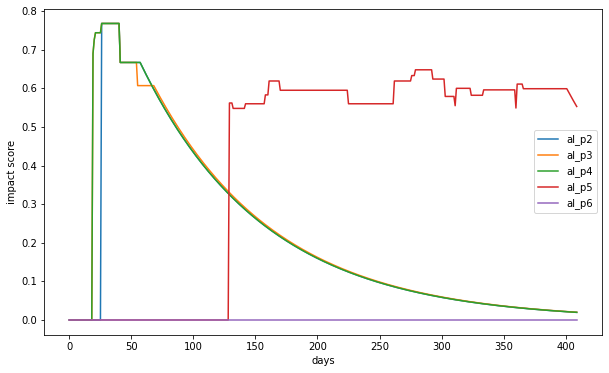

In [26]:
al_data.iloc[:,1:6].plot(figsize=(10,6))
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()

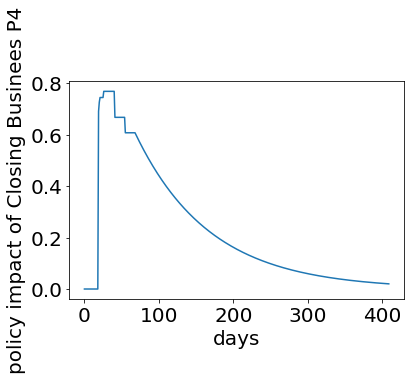

In [561]:
al_data["al_p3"].plot()
plt.xlabel("days")
plt.ylabel("policy impact of Closing Businees P4")
plt.show()

## Alaska (AK)

In [562]:
ak_data = pd.DataFrame(columns=["days",
                                       "ak_p2",
                                       "ak_p3",
                                       "ak_p4",
                                       "ak_p5",
                                       "ak_p6","ak_cases",

"%_change","target_conse_5"])
ak_data.days = data.days
ak_data.ak_cases = data.Alaska

ak_p1 = the_day("03-11-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ak_p2 = the_day("03-28-20")#Stay At home Policy -> 03-19-2020
ak_p3 = the_day("03-18-20") #Closing Restaurant and bars ->reopening -> 04-24-2020
ak_p4 = the_day(AK_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ak_p5 = the_day("04-24-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
ak_p6 = the_day(AK_Q) # 

ak_p2_end = the_day(AK_stay_lift) 
ak_p3_end = the_day(AK_rest_lift) 
ak_p4_end = the_day(AK_buss_lift) 
ak_p5_end = the_day(AK_FM_lift)  
ak_p6_end = the_day(AK_travel_lift)

policy_day_list_ak = [ak_p2,ak_p3,ak_p4,ak_p5,ak_p6]
policy_day_list_ak_end = [ak_p2_end,ak_p3_end,ak_p4_end,ak_p5_end,ak_p6_end]
ak_data["mean_of_7"] = ak_data.ak_cases.rolling(7).mean()
ak_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ak_data,state="ak")
print(policy_day_list_ak)
print(policy_day_list_ak_end)


[15, 5, 11, 42, 0]
[42, 42, 42, 70, 338]


In [563]:
# policy_difference(10, ak_p1, ak_p1_end, ak_data.days, ak_data,1, state="ak")
policy_difference(10, ak_p2, ak_p2_end, ak_data.days, ak_data,2, state="ak")
policy_difference(10, ak_p3, ak_p3_end, ak_data.days, ak_data,3, state="ak")
policy_difference(10, ak_p4, ak_p4_end, ak_data.days, ak_data,4, state="ak")
policy_difference(10, ak_p5, ak_p5_end, ak_data.days, ak_data,5, state="ak")
policy_difference(10, ak_p6, ak_p6_end, ak_data.days, ak_data,6, state="ak")
 


In [564]:
breakpoints(ak_data,"ak")
# Target
target_conse_5(ak_data["mean_of_7"],ak_data.target_conse_5)

ak_data

,days,ak_p2,ak_p3,ak_p4,ak_p5,ak_p6,ak_cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,2,inf,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,5,1.500000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
555,556,NaN,NaN,NaN,NaN,NaN,687,0.001458,0,814.000000
556,557,NaN,NaN,NaN,NaN,NaN,830,0.208151,0,836.000000
557,558,NaN,NaN,NaN,NaN,NaN,1220,0.469880,0,858.000000
558,559,NaN,NaN,NaN,NaN,NaN,1273,0.043443,0,893.142857


In [565]:
# list(ak_data.ak_p4)

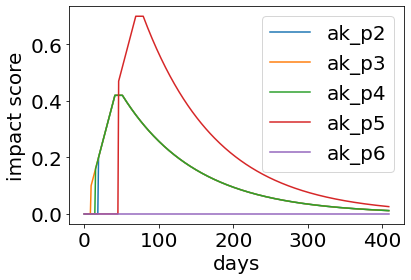

In [566]:
ak_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()

## Arizona(AZ)

In [27]:
az_data = pd.DataFrame(columns=["days",
                                       "az_p2",
                                       "az_p3",
                                       "az_p4",
                                       "az_p5",
                                       "az_p6",
                                       "az_cases",
                                       
"%_change","target_conse_5"])
az_data.days = data.days
az_data.az_cases = data.Arizona

az_p1 = the_day("03-11-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
az_p2 = the_day("03-31-20")#Stay At home Policy -> 03-19-2020
az_p3 = the_day("03-21-20") #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
az_p4 = the_day(AZ_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
az_p5 = the_day("05-08-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
az_p6 = the_day(AZ_Q) # first vaccination

az_p2_end = the_day(AZ_stay_lift)   
az_p3_end = the_day(AZ_rest_lift)   
az_p4_end = the_day(AZ_buss_lift)   
az_p5_end = the_day(AZ_FM_lift)     
az_p6_end = the_day(AZ_travel_lift) 

policy_day_list_az = [al_p1,al_p2,al_p3,al_p4,al_p5,al_p6]
az_data["mean_of_7"] = az_data.az_cases.rolling(7).mean()
az_data["mean_of_7"].fillna(0,inplace=True)
percent_change(az_data,state="az")
policy_day_list_az

[0, 22, 15, 15, 125, 0]

In [28]:
# policy_difference(10, az_p1, az_p1_end, az_data.days, az_data,1, state="az")
policy_difference(10, az_p2, az_p2_end, az_data.days, az_data,2, state="az")
policy_difference(10, az_p3, az_p3_end, az_data.days, az_data,3, state="az")
policy_difference(10, az_p4, az_p4_end, az_data.days, az_data,4, state="az")
policy_difference(10, az_p5, az_p5_end, az_data.days, az_data,5, state="az")
policy_difference(10, az_p6, az_p6_end, az_data.days, az_data,6, state="az")
 


In [29]:
target_conse_5(az_data["mean_of_7"],az_data.target_conse_5)







In [30]:
az_data

,days,az_p2,az_p3,az_p4,az_p5,az_p6,az_cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,2,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,1,-0.500000,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,5,4.000000,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,0,-1.000000,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,9,inf,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
555,556,NaN,NaN,NaN,NaN,NaN,2020,-0.177859,1,2563.571429
556,557,NaN,NaN,NaN,NaN,NaN,1934,-0.042574,1,2467.142857
557,558,NaN,NaN,NaN,NaN,NaN,2106,0.088935,1,2420.571429
558,559,NaN,NaN,NaN,NaN,NaN,3013,0.430674,0,2443.142857


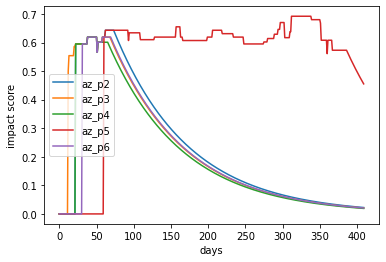

In [31]:
az_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()

## Arkansas(AR) 

In [572]:
ar_data = pd.DataFrame(columns=["days",
                                       "ar_p2",
                                       "ar_p3",
                                       "ar_p4",
                                       "ar_p5",
                                       "ar_p6","ar_cases",
                                       
"%_change","target_conse_5"])
ar_data.days = data.days
ar_data.ar_cases = data.Arkansas

ar_p1 = the_day("03-11-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ar_p2 = the_day("")#Stay At home Policy -> 03-19-2020
ar_p3 = the_day("03-20-20") #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
ar_p4 = the_day("11-09-20") # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ar_p5 = the_day("07-20-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
ar_p6 = the_day(AR_Q) # first vaccination

ar_p2_end = the_day(AR_stay_lift)   
ar_p3_end = the_day(AR_rest_lift)   
ar_p4_end = the_day(AR_buss_lift)   
ar_p5_end = the_day(AR_FM_lift)     
ar_p6_end = the_day(AR_travel_lift) 

policy_day_list_ar = [ar_p1,ar_p2,ar_p3,ar_p4,ar_p5,ar_p6]
ar_data["mean_of_7"] = ar_data.ar_cases.rolling(7).mean()
ar_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ar_data,state="ar")
policy_day_list_ar


[0, 0, 7, 241, 129, 53]

In [573]:
# policy_difference(10, ar_p1,  ar_p1_end, al_data.days, ar_data,1, state="ar")
policy_difference(10, ar_p2,  ar_p2_end, al_data.days, ar_data,2, state="ar")
policy_difference(10, ar_p3,  ar_p3_end, al_data.days, ar_data,3, state="ar")
policy_difference(10, ar_p4,  ar_p4_end, al_data.days, ar_data,4, state="ar")
policy_difference(10, ar_p5,  ar_p5_end, al_data.days, ar_data,5, state="ar")
policy_difference(10, ar_p6,  ar_p6_end, al_data.days, ar_data,6, state="ar")


In [574]:


target_conse_5(ar_data["mean_of_7"],ar_data.target_conse_5)





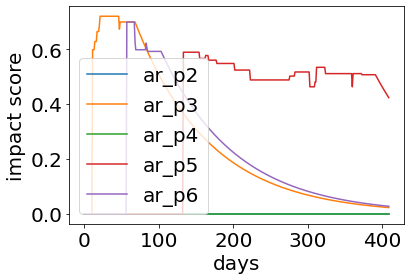

In [575]:
ar_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()

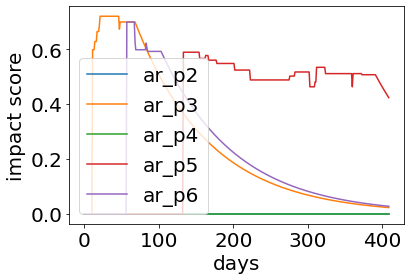

In [576]:
ar_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()

## California(CA)

In [32]:
ca_data = pd.DataFrame(columns=["days",
                                       "ca_p2",
                                       "ca_p3",
                                       "ca_p4",
                                       "ca_p5",
                                       "ca_p6","ca_cases","%_change","target_conse_5"])
ca_data.days = data.days
ca_data.ca_cases = data.CA
ca_data.ca_target= np.nan


ca_data["mean_of_7"] = ca_data.ca_cases.rolling(7).mean()
ca_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ca_data,state="ca")



In [33]:
#CALIFORNIA STATE
# Policy Implementation Date
# ca_p1 = the_day(CA_stay)   #Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ca_p2 = the_day("03-19-2020")   #Stay At home Policy -> 03-19-2020
ca_p3 = the_day(CA_rest)    #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
ca_p4 = the_day(CA_buss)      # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ca_p5 = the_day("06-18-2020")  # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
ca_p6 = the_day(CA_Q) # first vaccination

#Interstate policy not mentioned

###########################-PHASE 2-#######################################

policy_day_list_ca = [ca_p2,ca_p3,ca_p4,ca_p5,ca_p6]


ca_p2_end = the_day(CA_stay_lift)   
ca_p3_end = the_day(CA_rest_lift)   
ca_p4_end = the_day(CA_buss_lift)   
ca_p5_end = the_day(CA_FM_lift)     
ca_p6_end = the_day(CA_travel_lift) 


In [34]:
policy_day_list_ca = [ca_p2,ca_p3,ca_p4,ca_p5,ca_p6]
policy_day_list_ca_end = [ca_p2_end,ca_p3_end,ca_p4_end,ca_p5_end,ca_p6_end]
print(policy_day_list_ca)
print(policy_day_list_ca_end)

[6, 3, 6, 97, 0]
[318, 66, 56, 459, 0]


In [35]:

policy_difference(10,6,  ca_p2_end, ca_data.days, ca_data,2,state="ca")
policy_difference(10,3,  ca_p3_end,ca_data.days,ca_data,3,state="ca")
policy_difference(10,6, ca_p4_end,ca_data.days,ca_data,4,state="ca")
policy_difference(10,97,  ca_p5_end,ca_data.days,ca_data,5,state="ca")
policy_difference(10,0, ca_p6_end,ca_data.days,ca_data,6,state="ca")
# ca_data

Text(0, 0.5, 'Decay Impact')

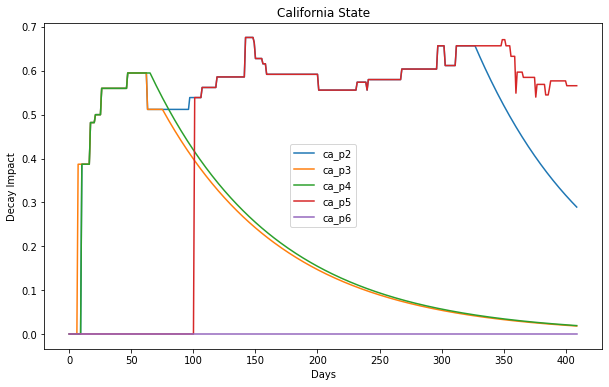

In [36]:
ca_data.iloc[:,1:6].plot(figsize=(10,6))
plt.title("California State")
plt.xlabel("Days")
plt.ylabel("Decay Impact")

Text(0, 0.5, 'Decay Impact')

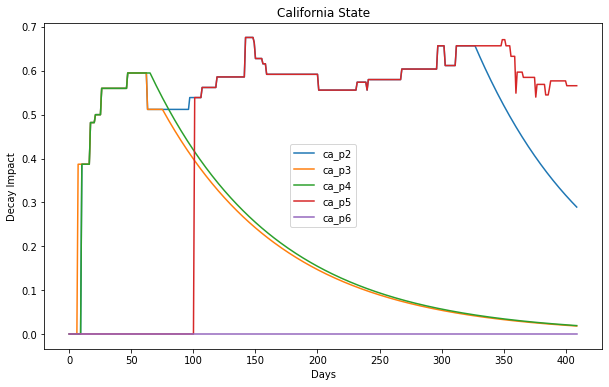

In [72]:
ca_data.iloc[:,1:6].plot(figsize=(10,6))
plt.title("California State")
plt.xlabel("Days")
plt.ylabel("Decay Impact")

In [583]:
target_conse_5(ca_data["mean_of_7"],ca_data.target_conse_5)
ca_data

,days,ca_p2,ca_p3,ca_p4,ca_p5,ca_p6,ca_cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,502,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,573,0.141434,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,503,-0.122164,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,600,0.192843,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,860,0.433333,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
555,556,NaN,NaN,NaN,NaN,NaN,3616,-0.462944,1,7271.571429
556,557,NaN,NaN,NaN,NaN,NaN,2554,-0.293695,1,6907.142857
557,558,NaN,NaN,NaN,NaN,NaN,4127,0.615897,1,6028.428571
558,559,NaN,NaN,NaN,NaN,NaN,729,-0.823358,1,4827.428571


## Colorado(CO)

In [584]:
co_data = pd.DataFrame(columns=["days",
                                       "co_p2",
                                       "co_p3",
                                       "co_p4",
                                       "co_p5",
                                       "co_p6","co_cases"
,"%_change","target_conse_5"])
co_data.days = data.days
co_data.co_cases = data.Colorado

co_p1 = the_day("03-11-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
co_p2 = the_day("03-26-20")#Stay At home Policy -> 03-19-2020
co_p3 = the_day("03-17-20") #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
co_p4 = the_day(CO_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
co_p5 = the_day("07-16-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
co_p6 = the_day(CO_Q) # first vaccinationk

co_p2_end = the_day(CO_stay_lift)  
co_p3_end = the_day(CO_rest_lift)  
co_p4_end = the_day(CO_buss_lift)  
co_p5_end = the_day(CO_FM_lift)    
co_p6_end = the_day(CO_travel_lift)

policy_day_list_co = [co_p2,co_p3,co_p4,co_p5,co_p6]
policy_day_list_co_end = [co_p2_end,co_p3_end,co_p4_end,co_p5_end,co_p6_end]
co_data["mean_of_7"] = co_data.co_cases.rolling(7).mean()
co_data["mean_of_7"].fillna(0,inplace=True)
percent_change(co_data,state="co")
print(policy_day_list_co)
print(policy_day_list_co_end)



[13, 4, 6, 125, 0]
[45, 75, 49, 428, 0]


In [585]:
# policy_difference(10, co_p1, co_p1_end, co_data.days, co_data,1, state="co")
policy_difference(10, co_p2, co_p2_end, co_data.days, co_data,2, state="co")
policy_difference(10, co_p3, co_p3_end, co_data.days, co_data,3, state="co")
policy_difference(10, co_p4, co_p4_end, co_data.days, co_data,4, state="co")
policy_difference(10, co_p5, co_p5_end, co_data.days, co_data,5, state="co")
policy_difference(10, co_p6, co_p6_end, co_data.days, co_data,6, state="co")

<AxesSubplot:>

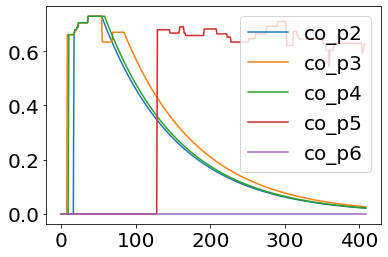

In [586]:
co_data.iloc[:,1:6].plot()

In [587]:
target_conse_5(co_data["mean_of_7"],co_data.target_conse_5)
co_data



,days,co_p2,co_p3,co_p4,co_p5,co_p6,co_cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,27,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,32,0.185185,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,35,0.093750,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,34,-0.028571,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,30,-0.117647,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
555,556,NaN,NaN,NaN,NaN,NaN,1094,-0.276455,1,1788.000000
556,557,NaN,NaN,NaN,NaN,NaN,1337,0.222121,1,1733.714286
557,558,NaN,NaN,NaN,NaN,NaN,1432,0.071055,1,1647.571429
558,559,NaN,NaN,NaN,NaN,NaN,1454,0.015363,1,1552.000000


## Connecticut(CT)

In [37]:
ct_data = pd.DataFrame(columns=["days",
                                       "ct_p2",
                                       "ct_p3",
                                       "ct_p4",
                                       "ct_p5",
                                       "ct_p6","ct_cases",
"%_change","target_conse_5"])
ct_data.days = data.days
ct_data.ct_cases = data.Connectiut

ct_p1 = the_day("03-10-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ct_p2 = the_day("03-23-20")#Stay At home Policy -> 03-19-2020
ct_p3 = the_day(CT_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
ct_p4 = the_day(CT_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ct_p5 = the_day("04-20-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
ct_p6 = the_day(CT_Q) # 

ct_p2_end = the_day(CT_stay_lift)  
ct_p3_end = the_day(CT_rest_lift)  
ct_p4_end = the_day(CT_buss_lift)  
ct_p5_end = the_day(CT_FM_lift)    
ct_p6_end = the_day(CT_travel_lift)

policy_day_list_ct = [ct_p2,ct_p3,ct_p4,ct_p5,ct_p6]
policy_day_list_ct_end = [ct_p2_end,ct_p3_end,ct_p4_end,ct_p5_end,ct_p6_end]

ct_data["mean_of_7"] = ct_data.ct_cases.rolling(7).mean()
ct_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ct_data,state="ct")
print(policy_day_list_ct)
print(policy_day_list_ct_end)



[10, 3, 10, 38, 104]
[68, 68, 68, 432, 371]


In [38]:
# policy_difference(10, ct_p1, ct_p1_end, ct_data.days, ct_data,1, state="ct")
policy_difference(10, ct_p2, ct_p2_end, ct_data.days, ct_data,2, state="ct")
policy_difference(10, ct_p3, ct_p3_end, ct_data.days, ct_data,3, state="ct")
policy_difference(10, ct_p4, ct_p4_end, ct_data.days, ct_data,4, state="ct")
policy_difference(10, ct_p5, ct_p5_end, ct_data.days, ct_data,5, state="ct")
policy_difference(10, ct_p6, ct_p6_end, ct_data.days, ct_data,6, state="ct")


<AxesSubplot:>

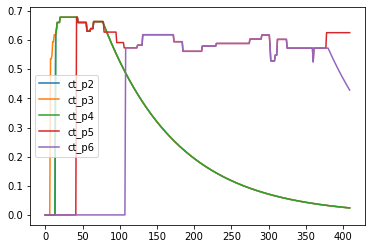

In [39]:
ct_data.iloc[:,1:6].plot()

In [591]:
target_conse_5(ct_data["mean_of_7"],ct_data.target_conse_5)
ct_data[:410]

,days,ct_p2,ct_p3,ct_p4,ct_p5,ct_p6,ct_cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,19,inf,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,15,-0.210526,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,27,0.800000,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,28,0.037037,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
405,406,0.024985,0.024985,0.024985,0.626,0.446253,1034,0.402985,0,814.857143
406,407,0.024737,0.024737,0.024737,0.626,0.441813,722,-0.301741,0,806.714286
407,408,0.02449,0.02449,0.02449,0.626,0.437416,722,0.000000,0,798.428571
408,409,0.024247,0.024247,0.024247,0.626,0.433064,723,0.001385,1,790.285714


## Delaware(DE)

In [592]:
de_data = pd.DataFrame(columns=["days",
                                       "de_p2",
                                       "de_p3",
                                       "de_p4",
                                       "de_p5",
                                       "de_p6","de_cases",
"%_change","target_conse_5"])
de_data.days = data.days
de_data.de_cases = data.Delaware
de_p1 = the_day("03-13-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
de_p2 = the_day("03-24-20")#Stay At home Policy -> 03-19-2020
de_p3 = the_day(DE_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
de_p4 = the_day(DE_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
de_p5 = the_day("04-28-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
de_p6 = the_day(DE_Q) # first vaccinationk

de_p2_end = the_day(DE_stay_lift)  
de_p3_end = the_day(DE_rest_lift)  
de_p4_end = the_day(DE_buss_lift)  
de_p5_end = the_day(DE_FM_lift)    
de_p6_end = the_day(DE_travel_lift)


policy_day_list_de = [de_p1,de_p2,de_p3,de_p4,de_p5,de_p6]
de_data["mean_of_7"] = de_data.de_cases.rolling(7).mean()
de_data["mean_of_7"].fillna(0,inplace=True)
percent_change(de_data,state="de")
policy_day_list_de


[0, 11, 3, 11, 46, 0]

In [593]:
# policy_difference(10, de_p1, de_p1_end, de_data.days, de_data,1, state="de")
policy_difference(10, de_p2, de_p2_end, de_data.days, de_data,2, state="de")
policy_difference(10, de_p3, de_p3_end, de_data.days, de_data,3, state="de")
policy_difference(10, de_p4, de_p4_end, de_data.days, de_data,4, state="de")
policy_difference(10, de_p5, de_p5_end, de_data.days, de_data,5, state="de")
policy_difference(10, de_p6, de_p6_end, de_data.days, de_data,6, state="de")
 


<AxesSubplot:>

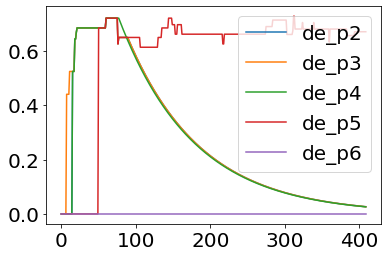

In [594]:
de_data.iloc[:,1:6].plot()


In [595]:
target_conse_5(de_data["mean_of_7"],de_data.target_conse_5)
de_data

,days,de_p2,de_p3,de_p4,de_p5,de_p6,de_cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,4,inf,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,0,-1.000000,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,1,inf,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
555,556,NaN,NaN,NaN,NaN,NaN,252,0.012048,0,442.000000
556,557,NaN,NaN,NaN,NaN,NaN,554,1.198413,0,470.857143
557,558,NaN,NaN,NaN,NaN,NaN,618,0.115523,0,466.285714
558,559,NaN,NaN,NaN,NaN,NaN,581,-0.059871,0,461.142857


## District of Columbia(DC)

In [596]:
dc_data = pd.DataFrame(columns=["days",
                                       "dc_p2",
                                       "dc_p3",
                                       "dc_p4",
                                       "dc_p5",
                                       "dc_p6","dc_cases",
                                      
"%_change","target_conse_5"])
dc_data.days = data.days
dc_data.dc_cases = data.district_of_columbua
dc_p1 = the_day("03-11-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
dc_p2 = the_day("04-01-20")#Stay At home Policy -> 03-19-2020
dc_p3 = the_day(DC_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
dc_p4 = the_day(DC_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
dc_p5 = the_day("07-22-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
dc_p6 = the_day(DC_Q) # first vaccinationk

dc_p2_end = the_day(DC_stay_lift)  
dc_p3_end = the_day(DC_rest_lift)  
dc_p4_end = the_day(DC_buss_lift)  
dc_p5_end = the_day(DC_FM_lift)    
dc_p6_end = the_day(DC_travel_lift)


policy_day_list_dc = [dc_p1,dc_p2,dc_p3,dc_p4,dc_p5,dc_p6]
dc_data["mean_of_7"] = dc_data.dc_cases.rolling(7).mean()
dc_data["mean_of_7"].fillna(0,inplace=True)
percent_change(dc_data,state="dc")
policy_day_list_dc


[0, 19, 3, 12, 131, 136]

In [597]:
# policy_difference(10, dc_p1, dc_p1_end, dc_data.days, dc_data,1, state="dc")
policy_difference(10, dc_p2, dc_p2_end, dc_data.days, dc_data,2, state="dc")
policy_difference(10, dc_p3, dc_p3_end, dc_data.days, dc_data,3, state="dc")
policy_difference(10, dc_p4, dc_p4_end, dc_data.days, dc_data,4, state="dc")
policy_difference(10, dc_p5, dc_p5_end, dc_data.days, dc_data,5, state="dc")
policy_difference(10, dc_p6, dc_p6_end, dc_data.days, dc_data,6, state="dc")
 

In [598]:
target_conse_5(dc_data["mean_of_7"],dc_data.target_conse_5)


## Florida (fl)

In [40]:
fl_data = pd.DataFrame(columns=["days",
                                       "fl_p2",
                                       "fl_p3",
                                       "fl_p4",
                                       "fl_p5",
                                       "fl_p6","fl_cases",
                                     
"%_change","target_conse_5"])
fl_data.days = data.days
fl_data.fl_cases = data.FL
fl_p1 = the_day("03-09-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
fl_p2 = the_day("04-03-20")#Stay At home Policy -> 03-19-2020
fl_p3 = the_day(FL_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
fl_p4 = the_day(FL_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
fl_p5 = the_day("05-11-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
fl_p6 = the_day(FL_Q) # first vaccinationk

fl_p2_end = the_day(FL_stay_lift)  
fl_p3_end = the_day(FL_rest_lift)  
fl_p4_end = the_day(FL_buss_lift)  
fl_p5_end = the_day(FL_FM_lift)    
fl_p6_end = the_day(FL_travel_lift)


policy_day_list_fl = [fl_p2,fl_p3,fl_p4,fl_p5,fl_p6]
policy_day_list_fl_end = [fl_p2_end,fl_p3_end,fl_p4_end,fl_p5_end,fl_p6_end]

fl_data["mean_of_7"] = fl_data.fl_cases.rolling(7).mean()
fl_data["mean_of_7"].fillna(0,inplace=True)
percent_change(fl_data,state="fl")
policy_day_list_fl


# policy_difference(10, fl_p1,  fl_p1_end, fl_data.days, fl_data,1, state="fl")
policy_difference(10, fl_p2,  fl_p2_end, fl_data.days, fl_data,2, state="fl")
policy_difference(10, fl_p3,  fl_p3_end, fl_data.days, fl_data,3, state="fl")
policy_difference(10, fl_p4,  fl_p4_end, fl_data.days, fl_data,4, state="fl")
policy_difference(10, fl_p5,  fl_p5_end, fl_data.days, fl_data,5, state="fl")
policy_difference(10, fl_p6,  fl_p6_end, fl_data.days, fl_data,6, state="fl")



target_conse_5(fl_data["mean_of_7"],fl_data.target_conse_5)
fl_data


,days,fl_p2,fl_p3,fl_p4,fl_p5,fl_p6,fl_cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,7186,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,7830,0.089619,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,6389,-0.184036,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,10143,0.587572,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,6986,-0.311249,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
555,556,NaN,NaN,NaN,NaN,NaN,99,0.302632,1,182.285714
556,557,NaN,NaN,NaN,NaN,NaN,62,-0.373737,1,150.714286
557,558,NaN,NaN,NaN,NaN,NaN,27,-0.564516,1,129.428571
558,559,NaN,NaN,NaN,NaN,NaN,31,0.148148,1,91.428571


In [41]:
print(policy_day_list_fl)

print(policy_day_list_fl_end)

[21, 21, 21, 59, 11]
[66, 66, 66, 417, 145]


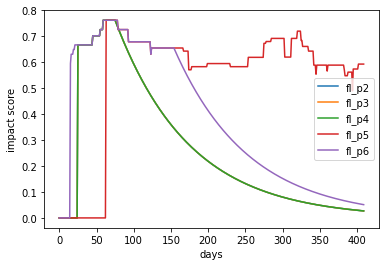

In [42]:
fl_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()

## Georgia (GA)

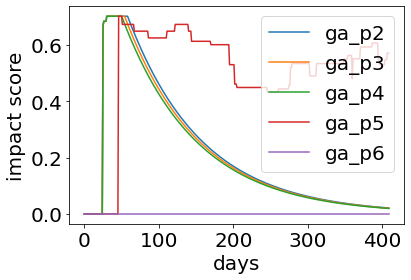

In [602]:
ga_data = pd.DataFrame(columns=["days",
                                       "ga_p2",
                                       "ga_p3",
                                       "ga_p4",
                                       "ga_p5",
                                       "ga_p6","ga_cases",
                                      




"%_change","target_conse_5"])
ga_data.days = data.days
ga_data.ga_cases = data.Georgia
ga_p1 = the_day("03-14-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ga_p2 = the_day("04-03-20")#Stay At home Policy -> 03-19-2020
ga_p3 = the_day(GA_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
ga_p4 = the_day(GA_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ga_p5 = the_day("04-24-20") # Face Mask Mandate 
ga_p6 = the_day(GA_Q) # first vaccinationk

ga_p2_end = the_day(GA_stay_lift)  
ga_p3_end = the_day(GA_rest_lift)  
ga_p4_end = the_day(GA_buss_lift)  
ga_p5_end = the_day(GA_FM_lift)    
ga_p6_end = the_day(GA_travel_lift)


policy_day_list_ga = [ga_p2,ga_p3,ga_p4,ga_p5,ga_p6]
ga_data["mean_of_7"] = ga_data.ga_cases.rolling(7).mean()
ga_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ga_data,state="ga")
policy_day_list_ga

# policy_difference(10, ga_p1, ga_p1_end, ga_data.days, ga_data,1, state="ga")
policy_difference(10, ga_p2, ga_p2_end, ga_data.days, ga_data,2, state="ga")
policy_difference(10, ga_p3, ga_p3_end, ga_data.days, ga_data,3, state="ga")
policy_difference(10, ga_p4, ga_p4_end, ga_data.days, ga_data,4, state="ga")
policy_difference(10, ga_p5, ga_p5_end, ga_data.days, ga_data,5, state="ga")
policy_difference(10, ga_p6, ga_p6_end, ga_data.days, ga_data,6, state="ga")
 



target_conse_5(ga_data["mean_of_7"],ga_data.target_conse_5)
ga_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()





## Hawaii (HI)

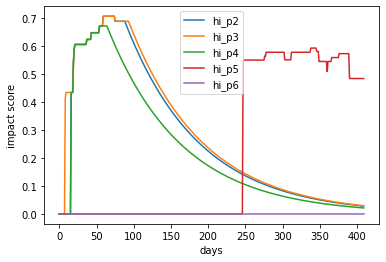

In [43]:
hi_data = pd.DataFrame(columns=["days",
                                       "hi_p2",
                                       "hi_p3",
                                       "hi_p4",
                                       "hi_p5",
                                       "hi_p6","hi_cases",
                                       




"%_change",'target_with_PELT',"target_conse_5","target_conse_3_policy"])
hi_data.days = data.days
hi_data.hi_cases = data.Hawaii
hi_p1 = the_day("03-04-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
hi_p2 = the_day("03-25-20")#Stay At home Policy -> 03-19-2020
hi_p3 = the_day(HI_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
hi_p4 = the_day(HI_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
hi_p5 = the_day("11-16-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
hi_p6 = the_day(HI_Q) # first vaccinationk

hi_p2_end = the_day(HI_stay_lift)  
hi_p3_end = the_day(HI_rest_lift)  
hi_p4_end = the_day(HI_buss_lift)  
hi_p5_end = the_day(HI_FM_lift)    
hi_p6_end = the_day(HI_travel_lift)


policy_day_list_hi = [hi_p1,hi_p2,hi_p3,hi_p4,hi_p5,hi_p6]
hi_data["mean_of_7"] = hi_data.hi_cases.rolling(7).mean()
hi_data["mean_of_7"].fillna(0,inplace=True)
percent_change(hi_data,state="hi")
policy_day_list_hi


# policy_difference(10, hi_p1, hi_data.days, hi_data,1, state="hi")
policy_difference(10, hi_p2, hi_p2_end, hi_data.days, hi_data,2, state="hi")
policy_difference(10, hi_p3, hi_p3_end, hi_data.days, hi_data,3, state="hi")
policy_difference(10, hi_p4, hi_p4_end, hi_data.days, hi_data,4, state="hi")
policy_difference(10, hi_p5, hi_p5_end, hi_data.days, hi_data,5, state="hi")
policy_difference(10, hi_p6, hi_p6_end, hi_data.days, hi_data,6, state="hi")
 

target_conse_5(hi_data["mean_of_7"],hi_data.target_conse_5)

hi_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()




## Idaho (ID)

In [604]:
id_data = pd.DataFrame(columns=["days","id_p2",
                                       "id_p3",
                                       "id_p4",
                                       "id_p5",
                                       "id_p6","id_cases",
                                       




"%_change","target_conse_5"])
id_data.days = data.days
id_data.id_cases = data.Idaho
id_p1 = the_day("03-13-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
id_p2 = the_day("03-25-20")#Stay At home Policy -> 03-19-2020
id_p3 = the_day(ID_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
id_p4 = the_day(ID_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
id_p5 = the_day("") # Face Mask Mandate https://rebound.idaho.gov/stages-of-reopening/
id_p6 = the_day(ID_Q) # first vaccinationk

id_p2_end = the_day(ID_stay_lift)  
id_p3_end = the_day(ID_rest_lift)  
id_p4_end = the_day(ID_buss_lift)  
id_p5_end = the_day(ID_FM_lift)    
id_p6_end = the_day(ID_travel_lift)


policy_day_list_id = [id_p2,id_p3,id_p4,id_p5,id_p6]
policy_day_list_id_end = [id_p2_end,id_p3_end,id_p4_end,id_p5_end,id_p6_end]

id_data["mean_of_7"] = id_data.id_cases.rolling(7).mean()
id_data["mean_of_7"].fillna(0,inplace=True)
percent_change(id_data,state="id")
policy_day_list_id


# policy_difference(10, id_p1, id_data.days, id_data,1, state="id")
policy_difference(10, id_p2, id_p2_end, id_data.days, id_data,2, state="id")
policy_difference(10, id_p3, id_p3_end, id_data.days, id_data,3, state="id")
policy_difference(10, id_p4, id_p4_end, id_data.days, id_data,4, state="id")
policy_difference(10, id_p5, id_p5_end, id_data.days, id_data,5, state="id")
policy_difference(10, id_p6, id_p6_end, id_data.days, id_data,6, state="id")
 

target_conse_5(id_data["mean_of_7"],id_data.target_conse_5)
id_data[:410]

,days,id_p2,id_p3,id_p4,id_p5,id_p6,id_cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,1,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,4,3.000000,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,0,-1.000000,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,5,inf,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
405,406,0.020195,0.023463,0.020195,0.0,0.0,190,-0.188034,0,202.000000
406,407,0.019994,0.02323,0.019994,0.0,0.0,91,-0.521053,0,189.428571
407,408,0.019795,0.022999,0.019795,0.0,0.0,91,0.000000,0,195.000000
408,409,0.019598,0.02277,0.019598,0.0,0.0,360,2.956044,0,214.000000


In [605]:
print(policy_day_list_id) 
print(policy_day_list_id_end)

[12, 12, 12, 0, 0]
[49, 64, 49, 0, 64]


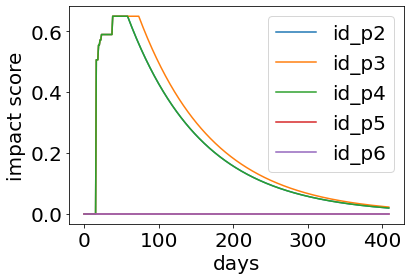

In [606]:
id_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()

## Illinois (IL)

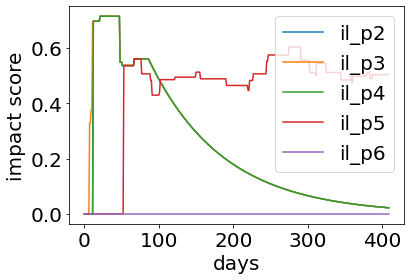

In [607]:
il_data = pd.DataFrame(columns=["days",
                                       "il_p2",
                                       "il_p3",
                                       "il_p4",
                                       "il_p5",
                                       "il_p6","il_cases",
                                       




"%_change","target_conse_5"])
il_data.days = data.days
il_data.il_cases = data.Illinois
il_p1 = the_day("03-09-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
il_p2 = the_day("03-21-20")#Stay At home Policy -> 03-19-2020
il_p3 = the_day(IL_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
il_p4 = the_day(IL_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
il_p5 = the_day("05-01-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
il_p6 = the_day(IL_Q) # first vaccinationk

il_p2_end = the_day(IL_stay_lift)  
il_p3_end = the_day(IL_rest_lift)  
il_p4_end = the_day(IL_buss_lift)  
il_p5_end = the_day(IL_FM_lift)    
il_p6_end = the_day(IL_travel_lift)


policy_day_list_il = [il_p1,il_p2,il_p3,il_p4,il_p5,il_p6]
il_data["mean_of_7"] = il_data.il_cases.rolling(7).mean()
il_data["mean_of_7"].fillna(0,inplace=True)
percent_change(il_data,state="il")
policy_day_list_il


# policy_difference(10, il_p1, il_data.days, il_data,1, state="il")
policy_difference(10, il_p2, il_p2_end, il_data.days, il_data,2, state="il")
policy_difference(10, il_p3, il_p3_end, il_data.days, il_data,3, state="il")
policy_difference(10, il_p4, il_p4_end, il_data.days, il_data,4, state="il")
policy_difference(10, il_p5, il_p5_end, il_data.days, il_data,5, state="il")
policy_difference(10, il_p6, il_p6_end, il_data.days, il_data,6, state="il")
 
target_conse_5(il_data["mean_of_7"],il_data.target_conse_5)
il_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()

## Indiana (IN)

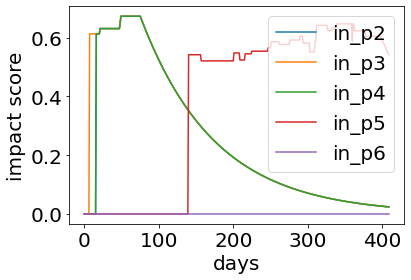

In [608]:
in_data = pd.DataFrame(columns=["days",
                                       "in_p2",
                                       "in_p3",
                                       "in_p4",
                                       "in_p5",
                                       "in_p6","in_cases",
                                       




"%_change","target_conse_5"])
in_data.days = data.days
in_data.in_cases = data.Indiana
in_p1 = the_day("03-06-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
in_p2 = the_day("03-25-20")#Stay At home Policy -> 03-19-2020
in_p3 = the_day(IN_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
in_p4 = the_day(IN_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
in_p5 = the_day("07-27-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
in_p6 = the_day(IN_Q) # first vaccinationk

in_p2_end = the_day(IN_stay_lift)  
in_p3_end = the_day(IN_rest_lift)  
in_p4_end = the_day(IN_buss_lift)  
in_p5_end = the_day(IN_FM_lift)    
in_p6_end = the_day(IN_travel_lift)


policy_day_list_in = [in_p1,in_p2,in_p3,in_p4,in_p5,in_p6]
in_data["mean_of_7"] = in_data.in_cases.rolling(7).mean()
in_data["mean_of_7"].fillna(0,inplace=True)
percent_change(in_data,state="in")
policy_day_list_in

# policy_difference(10, in_p1, in_data.days, in_data,1, state="in")
policy_difference(10, in_p2, in_p2_end, in_data.days, in_data,2, state="in")
policy_difference(10, in_p3, in_p3_end, in_data.days, in_data,3, state="in")
policy_difference(10, in_p4, in_p4_end, in_data.days, in_data,4, state="in")
policy_difference(10, in_p5, in_p5_end, in_data.days, in_data,5, state="in")
policy_difference(10, in_p6, in_p6_end, in_data.days, in_data,6, state="in")
 



target_conse_5(in_data["mean_of_7"],in_data.target_conse_5)
in_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()





## Iowa (IA)

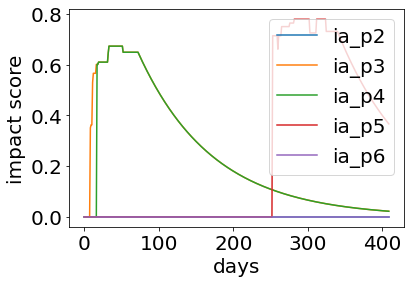

In [609]:
ia_data = pd.DataFrame(columns=["days",
                                       "ia_p2",
                                       "ia_p3",
                                       "ia_p4",
                                       "ia_p5",
                                       "ia_p6","ia_cases",
                                       

"%_change","target_conse_5"])
ia_data.days = data.days
ia_data.ia_cases = data.Iowa
ia_p1 = the_day("03-09-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ia_p2 = the_day("")#Stay At home Policy -> 03-19-2020
ia_p3 = the_day(IA_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
ia_p4 = the_day(IA_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ia_p5 = the_day("11-17-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
ia_p6 = the_day(IA_Q) # first vaccinationk

ia_p2_end = the_day(IA_stay_lift)  
ia_p3_end = the_day(IA_rest_lift)  
ia_p4_end = the_day(IA_buss_lift)  
ia_p5_end = the_day(IA_FM_lift)    
ia_p6_end = the_day(IA_travel_lift)

policy_day_list_ia = [ia_p1,ia_p2,ia_p3,ia_p4,ia_p5,ia_p6]
ia_data["mean_of_7"] = ia_data.ia_cases.rolling(7).mean()
ia_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ia_data,state="ia")
policy_day_list_ia

# policy_difference(10, ia_p1, ia_data.days, ia_data,1, state="ia")
policy_difference(10, ia_p2, ia_p2_end, ia_data.days, ia_data,2, state="ia")
policy_difference(10, ia_p3, ia_p3_end, ia_data.days, ia_data,3, state="ia")
policy_difference(10, ia_p4, ia_p4_end, ia_data.days, ia_data,4, state="ia")
policy_difference(10, ia_p5, ia_p5_end, ia_data.days, ia_data,5, state="ia")
policy_difference(10, ia_p6, ia_p6_end, ia_data.days, ia_data,6, state="ia")


target_conse_5(ia_data["mean_of_7"],ia_data.target_conse_5)

ia_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()




## Kansas (KS)

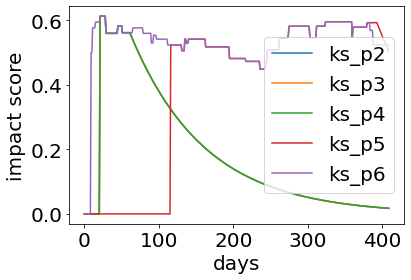

In [610]:
ks_data = pd.DataFrame(columns=["days",
                                       "ks_p2",
                                       "ks_p3",
                                       "ks_p4",
                                       "ks_p5",
                                       "ks_p6","ks_cases",
                                 


"%_change","target_conse_5"])
ks_data.days = data.days
ks_data.ks_cases = data.Kansas
ks_p1 = the_day("03-12-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ks_p2 = the_day("03-30-20")#Stay At home Policy -> 03-19-2020
ks_p3 = the_day(KS_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
ks_p4 = the_day(KS_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ks_p5 = the_day("07-03-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
ks_p6 = the_day(KS_Q) # first vaccinationk

ks_p2_end = the_day(KS_stay_lift)  
ks_p3_end = the_day(KS_rest_lift)  
ks_p4_end = the_day(KS_buss_lift)  
ks_p5_end = the_day(KS_FM_lift)    
ks_p6_end = the_day(KS_travel_lift)

policy_day_list_ks = [ks_p1,ks_p2,ks_p3,ks_p4,ks_p5,ks_p6]
ks_data["mean_of_7"] = ks_data.ks_cases.rolling(7).mean()
ks_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ks_data,state="ks")
policy_day_list_ks


# policy_difference(10, ks_p1, ks_data.days, ks_data,1, state="ks")
policy_difference(10, ks_p2, ks_p2_end, ks_data.days, ks_data,2, state="ks")
policy_difference(10, ks_p3, ks_p3_end, ks_data.days, ks_data,3, state="ks")
policy_difference(10, ks_p4, ks_p4_end, ks_data.days, ks_data,4, state="ks")
policy_difference(10, ks_p5, ks_p5_end, ks_data.days, ks_data,5, state="ks")
policy_difference(10, ks_p6, ks_p6_end, ks_data.days, ks_data,6, state="ks")
 
target_conse_5(ks_data["mean_of_7"],ks_data.target_conse_5)
ks_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


In [611]:
ks_data[:410]

,days,ks_p2,ks_p3,ks_p4,ks_p5,ks_p6,ks_cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,1,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,1,0.000000,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,3,2.000000,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,5,0.666667,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,5,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
405,406,0.01802,0.01802,0.01802,0.525944,0.524,245,0.004098,0,215.857143
406,407,0.017841,0.017841,0.017841,0.520711,0.524,164,-0.330612,0,239.285714
407,408,0.017664,0.017664,0.017664,0.515529,0.524,164,0.000000,0,262.714286
408,409,0.017488,0.017488,0.017488,0.5104,0.524,165,0.006098,0,225.000000


## Kentucky (KY)

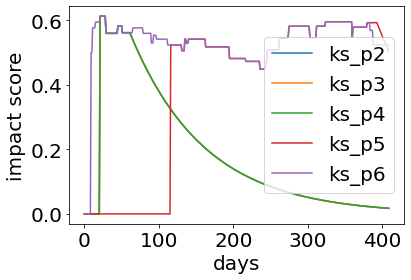

In [612]:
ky_data = pd.DataFrame(columns=["days",
                                       "ky_p2",
                                       "ky_p3",
                                       "ky_p4",
                                       "ky_p5",
                                       "ky_p6","ky_cases",




"%_change","target_conse_5"])
ky_data.days = data.days
ky_data.ky_cases = data.Kentucky
ky_p1 = the_day("03-06-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ky_p2 = the_day("03-26-20")#Stay At home Policy -> 03-19-2020
ky_p3 = the_day(KY_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
ky_p4 = the_day(KY_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ky_p5 = the_day("07-10-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
ky_p6 = the_day(KY_Q) # first vaccinationk

ky_p2_end = the_day(KY_stay_lift)  
ky_p3_end = the_day(KY_rest_lift)  
ky_p4_end = the_day(KY_buss_lift)  
ky_p5_end = the_day(KY_FM_lift)    
ky_p6_end = the_day(KY_travel_lift)

policy_day_list_ky = [ky_p1,ky_p2,ky_p3,ky_p4,ky_p5,ky_p6]
ky_data["mean_of_7"] = ky_data.ky_cases.rolling(7).mean()
ky_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ky_data,state="ky")
policy_day_list_ky


# policy_difference(10, ky_p1, ky_data.days, ky_data,1, state="ky")
policy_difference(10, ky_p2, ky_p2_end, ky_data.days, ky_data,2, state="ky")
policy_difference(10, ky_p3, ky_p3_end, ky_data.days, ky_data,3, state="ky")
policy_difference(10, ky_p4, ky_p4_end, ky_data.days, ky_data,4, state="ky")
policy_difference(10, ky_p5, ky_p5_end, ky_data.days, ky_data,5, state="ky")
policy_difference(10, ky_p6, ky_p6_end, ky_data.days, ky_data,6, state="ky")
 



target_conse_5(ky_data["mean_of_7"],ky_data.target_conse_5)
ks_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()






## Louisiana (LA)

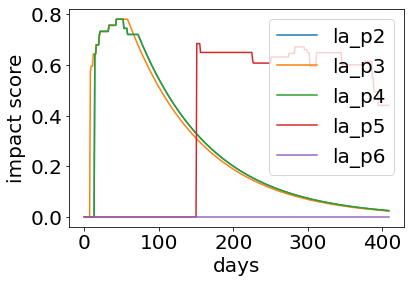

In [613]:
la_data = pd.DataFrame(columns=["days",
                                       "la_p2",
                                       "la_p3",
                                       "la_p4",
                                       "la_p5",
                                       "la_p6","la_cases",
                                       




"%_change","target_conse_5"])
la_data.days = data.days
la_data.la_cases = data.Louisiana
la_p1 = the_day("03-11-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
la_p2 = the_day("03-23-20")#Stay At home Policy -> 03-19-2020
la_p3 = the_day(LA_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
la_p4 = the_day(LA_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
la_p5 = the_day("08-07-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
la_p6 = the_day(LA_Q) # first vaccinationk

la_p2_end = the_day(LA_stay_lift)  
la_p3_end = the_day(LA_rest_lift)  
la_p4_end = the_day(LA_buss_lift)  
la_p5_end = the_day(LA_FM_lift)    
la_p6_end = the_day(LA_travel_lift)

policy_day_list_la = [la_p1,la_p2,la_p3,la_p4,la_p5,la_p6]
la_data["mean_of_7"] = la_data.la_cases.rolling(7).mean()
la_data["mean_of_7"].fillna(0,inplace=True)
percent_change(la_data,state="la")
policy_day_list_la


# policy_difference(10, la_p1, la_data.days, la_data,1, state="la")
policy_difference(10, la_p2, la_p2_end, la_data.days, la_data,2, state="la")
policy_difference(10, la_p3, la_p3_end, la_data.days, la_data,3, state="la")
policy_difference(10, la_p4, la_p4_end, la_data.days, la_data,4, state="la")
policy_difference(10, la_p5, la_p5_end, la_data.days, la_data,5, state="la")
policy_difference(10, la_p6, la_p6_end, la_data.days, la_data,6, state="la")



target_conse_5(la_data["mean_of_7"],la_data.target_conse_5)
la_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()

## Maryland (MD)

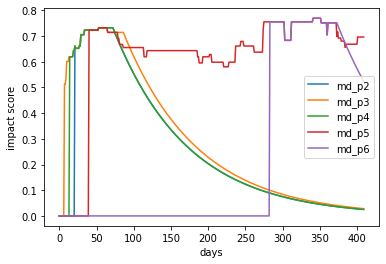

In [73]:
md_data = pd.DataFrame(columns=["days",
                                       "md_p2",
                                       "md_p3",
                                       "md_p4",
                                       "md_p5",
                                       "md_p6","md_cases",
                                      
"%_change","target_conse_5"])
md_data.days = data.days
md_data.md_cases = data.Maryland
md_p1 = the_day("03-05-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
md_p2 = the_day("03-30-20")#Stay At home Policy -> 03-19-2020
md_p3 = the_day(MD_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
md_p4 = the_day(MD_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
md_p5 = the_day("04-18-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
md_p6 = the_day(MD_Q) # first vaccinationk

md_p2_end = the_day(MD_stay_lift)  
md_p3_end = the_day(MD_rest_lift)  
md_p4_end = the_day(MD_buss_lift)  
md_p5_end = the_day(MD_FM_lift)    
md_p6_end = the_day(MD_travel_lift)

policy_day_list_md = [md_p1,md_p2,md_p3,md_p4,md_p5,md_p6]
md_data["mean_of_7"] = md_data.md_cases.rolling(7).mean()
md_data["mean_of_7"].fillna(0,inplace=True)
percent_change(md_data,state="md")
policy_day_list_md


# policy_difference(10, md_p1, md_p1_end, md_data.days, md_data,1, state="md")
policy_difference(10, md_p2, md_p2_end, md_data.days, md_data,2, state="md")
policy_difference(10, md_p3, md_p3_end, md_data.days, md_data,3, state="md")
policy_difference(10, md_p4, md_p4_end, md_data.days, md_data,4, state="md")
policy_difference(10, md_p5, md_p5_end, md_data.days, md_data,5, state="md")
policy_difference(10, md_p6, md_p6_end, md_data.days, md_data,6, state="md")
 

target_conse_5(md_data["mean_of_7"],md_data.target_conse_5)


md_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()



## Massachusetts (MA)

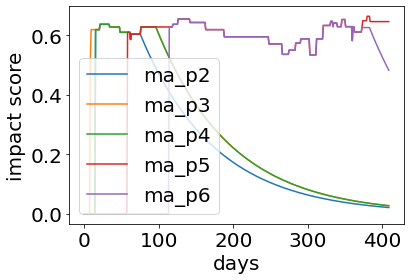

In [615]:
ma_data = pd.DataFrame(columns=["days",
                                       "ma_p2",
                                       "ma_p3",
                                       "ma_p4",
                                       "ma_p5",
                                       "ma_p6","ma_cases",
                                       




"%_change","target_conse_5"])
ma_data.days = data.days
ma_data.ma_cases =data.Massachusetts
ma_p1 = the_day("03-10-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ma_p2 = the_day("03-24-20")#Stay At home Policy -> 03-19-2020
ma_p3 = the_day(MA_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
ma_p4 = the_day(MA_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ma_p5 = the_day("05-06-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
ma_p6 = the_day(MA_Q) # first vaccinationk

ma_p2_end = the_day(MA_stay_lift)  
ma_p3_end = the_day(MA_rest_lift)  
ma_p4_end = the_day(MA_buss_lift)  
ma_p5_end = the_day(MA_FM_lift)    
ma_p6_end = the_day(MA_travel_lift)

policy_day_list_ma = [ma_p1,ma_p2,ma_p3,ma_p4,ma_p5,ma_p6]
ma_data["mean_of_7"] = ma_data.ma_cases.rolling(7).mean()
ma_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ma_data,state="ma")
policy_day_list_ma

# policy_difference(10, ma_p1, ma_data.days, ma_data,1, state="ma")
policy_difference(10, ma_p2,  ma_p2_end, ma_data.days, ma_data,2, state="ma")
policy_difference(10, ma_p3,  ma_p3_end, ma_data.days, ma_data,3, state="ma")
policy_difference(10, ma_p4,  ma_p4_end, ma_data.days, ma_data,4, state="ma")
policy_difference(10, ma_p5,  ma_p5_end, ma_data.days, ma_data,5, state="ma")
policy_difference(10, ma_p6,  ma_p6_end, ma_data.days, ma_data,6, state="ma")
 
target_conse_5(ma_data["mean_of_7"],ma_data.target_conse_5)

ma_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()

## Michigan (MI)

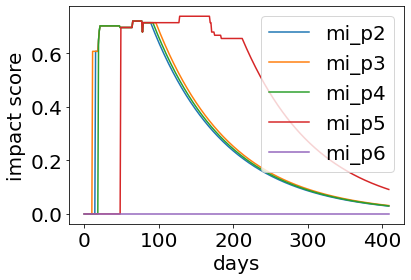

In [616]:
mi_data = pd.DataFrame(columns=["days",
                                       "mi_p2",
                                       "mi_p3",
                                       "mi_p4",
                                       "mi_p5",
                                       "mi_p6","mi_cases",
                                      




"%_change","target_conse_5"])
mi_data.days = data.days
mi_data.mi_cases= data.Michigan
mi_p1 = the_day("03-10-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
mi_p2 = the_day("03-24-20")#Stay At home Policy -> 03-19-2020
mi_p3 = the_day(MT_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
mi_p4 = the_day(MT_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
mi_p5 = the_day("04-27-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
mi_p6 = the_day(MT_Q) # first vaccinationk

mi_p2_end = the_day(MI_stay_lift)  
mi_p3_end = the_day(MI_rest_lift)  
mi_p4_end = the_day(MI_buss_lift)  
mi_p5_end = the_day(MI_FM_lift)    
mi_p6_end = the_day(MI_travel_lift)

policy_day_list_mi = [mi_p1,mi_p2,mi_p3,mi_p4,mi_p5,mi_p6]
mi_data["mean_of_7"] = mi_data.mi_cases.rolling(7).mean()
mi_data["mean_of_7"].fillna(0,inplace=True)
percent_change(mi_data,state="mi")
policy_day_list_mi

# policy_difference(10, mi_p1, mi_data.days, mi_data,1, state="mi")
policy_difference(10, mi_p2, mi_p2_end, mi_data.days, mi_data,2, state="mi")
policy_difference(10, mi_p3, mi_p3_end, mi_data.days, mi_data,3, state="mi")
policy_difference(10, mi_p4, mi_p4_end, mi_data.days, mi_data,4, state="mi")
policy_difference(10, mi_p5, mi_p5_end, mi_data.days, mi_data,5, state="mi")
policy_difference(10, mi_p6, mi_p6_end, mi_data.days, mi_data,6, state="mi")
 
target_conse_5(mi_data["mean_of_7"],mi_data.target_conse_5)

mi_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()

## Minnesota (MN)

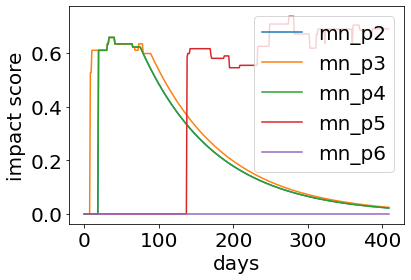

In [617]:
mn_data = pd.DataFrame(columns=["days",
                                       "mn_p2",
                                       "mn_p3",
                                       "mn_p4",
                                       "mn_p5",
                                       "mn_p6","mn_cases",
                                       




"%_change","target_conse_5"])
mn_data.days = data.days
mn_data.mn_cases = data.Minnesota
mn_p1 = the_day("03-13-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
mn_p2 = the_day("03-28-20")#Stay At home Policy -> 03-19-2020
mn_p3 = the_day(MN_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
mn_p4 = the_day(MN_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
mn_p5 = the_day("07-25-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
mn_p6 = the_day(MN_Q) # first vaccinationk

mn_p2_end = the_day(MN_stay_lift)  
mn_p3_end = the_day(MN_rest_lift)  
mn_p4_end = the_day(MN_buss_lift)  
mn_p5_end = the_day(MN_FM_lift)    
mn_p6_end = the_day(MN_travel_lift)

policy_day_list_mn = [mn_p1,mn_p2,mn_p3,mn_p4,mn_p5,mn_p6]
mn_data["mean_of_7"] = mn_data.mn_cases.rolling(7).mean()
mn_data["mean_of_7"].fillna(0,inplace=True)
percent_change(mn_data,state="mn")
policy_day_list_mn

# policy_difference(10, mn_p1, mn_data.days, mn_data,1, state="mn")
policy_difference(10, mn_p2, mn_p2_end, mn_data.days, mn_data,2, state="mn")
policy_difference(10, mn_p3, mn_p3_end, mn_data.days, mn_data,3, state="mn")
policy_difference(10, mn_p4, mn_p4_end, mn_data.days, mn_data,4, state="mn")
policy_difference(10, mn_p5, mn_p5_end, mn_data.days, mn_data,5, state="mn")
policy_difference(10, mn_p6, mn_p6_end, mn_data.days, mn_data,6, state="mn")
 
target_conse_5(mn_data["mean_of_7"],mn_data.target_conse_5)


mn_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()



## Mississippi (MS)

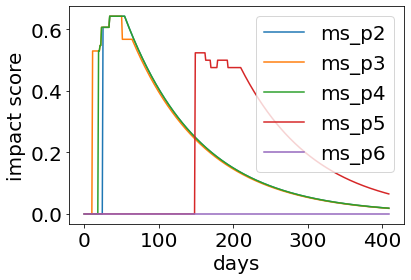

In [618]:
ms_data = pd.DataFrame(columns=["days",
                                       "ms_p2",
                                       "ms_p3",
                                       "ms_p4",
                                       "ms_p5",
                                       "ms_p6","ms_cases",
                                       




"%_change","target_conse_5"])
ms_data.days = data.days
ms_data.ms_cases = data.Mississippi
ms_p1 = the_day("03-14-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ms_p2 = the_day("04-03-20")#Stay At home Policy -> 03-19-2020
ms_p3 = the_day(MT_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
ms_p4 = the_day(MT_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ms_p5 = the_day("08-05-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
ms_p6 = the_day(MT_Q) # first vaccinationk

ms_p2_end = the_day(MS_stay_lift)  
ms_p3_end = the_day(MS_rest_lift)  
ms_p4_end = the_day(MS_buss_lift)  
ms_p5_end = the_day(MS_FM_lift)    
ms_p6_end = the_day(MS_travel_lift)

policy_day_list_ms = [ms_p1,ms_p2,ms_p3,ms_p4,ms_p5,ms_p6]
ms_data["mean_of_7"] = ms_data.ms_cases.rolling(7).mean()
ms_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ms_data,state="ms")
policy_day_list_ms

# policy_difference(10, ms_p1, ms_data.days, ms_data,1, state="ms")
policy_difference(10, ms_p2, ms_p2_end, ms_data.days, ms_data,2, state="ms")
policy_difference(10, ms_p3, ms_p3_end, ms_data.days, ms_data,3, state="ms")
policy_difference(10, ms_p4, ms_p4_end, ms_data.days, ms_data,4, state="ms")
policy_difference(10, ms_p5, ms_p5_end, ms_data.days, ms_data,5, state="ms")
policy_difference(10, ms_p6, ms_p6_end, ms_data.days, ms_data,6, state="ms")
 
target_conse_5(ms_data["mean_of_7"],ms_data.target_conse_5)

ms_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()

## Missouri (MO)

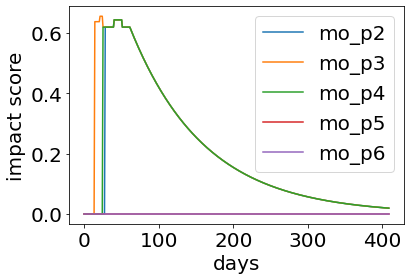

In [619]:
mo_data = pd.DataFrame(columns=["days",
                                       "mo_p2",
                                       "mo_p3",
                                       "mo_p4",
                                       "mo_p5",
                                       "mo_p6","mo_cases",
                                       




"%_change","target_conse_5"])
mo_data.days = data.days
mo_data.mo_cases = data.Missouri
mo_p1 = the_day("03-13-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
mo_p2 = the_day("04-06-20")#Stay At home Policy -> 03-19-2020
mo_p3 = the_day(MO_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
mo_p4 = the_day(MO_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
mo_p5 = the_day("") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
mo_p6 = the_day(MO_Q) # first vaccinationk

mo_p2_end = the_day(MO_stay_lift)  
mo_p3_end = the_day(MO_rest_lift)  
mo_p4_end = the_day(MO_buss_lift)  
mo_p5_end = the_day(MO_FM_lift)    
mo_p6_end = the_day(MO_travel_lift)

policy_day_list_mo = [mo_p1,mo_p2,mo_p3,mo_p4,mo_p5,mo_p6]
mo_data["mean_of_7"] = mo_data.mo_cases.rolling(7).mean()
mo_data["mean_of_7"].fillna(0,inplace=True)
percent_change(mo_data,state="mo")
policy_day_list_mo

# policy_difference(10, mo_p1, mo_data.days, mo_data,1, state="mo")
policy_difference(10, mo_p2, mo_p2_end, mo_data.days, mo_data,2, state="mo")
policy_difference(10, mo_p3, mo_p3_end, mo_data.days, mo_data,3, state="mo")
policy_difference(10, mo_p4, mo_p4_end, mo_data.days, mo_data,4, state="mo")
policy_difference(10, mo_p5, mo_p5_end, mo_data.days, mo_data,5, state="mo")
policy_difference(10, mo_p6, mo_p6_end, mo_data.days, mo_data,6, state="mo")
 
target_conse_5(mo_data["mean_of_7"],mo_data.target_conse_5)
mo_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


In [620]:
mo_data[:410]

,days,mo_p2,mo_p3,mo_p4,mo_p5,mo_p6,mo_cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,11,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,11,0.000000,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,28,1.545455,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,45,0.607143,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,55,0.222222,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
405,406,0.019848,0.019848,0.019848,0.0,0.0,716,-0.193694,0,2073.000000
406,407,0.019651,0.019651,0.019651,0.0,0.0,379,-0.470670,0,578.714286
407,408,0.019455,0.019455,0.019455,0.0,0.0,316,-0.166227,0,560.571429
408,409,0.019261,0.019261,0.019261,0.0,0.0,524,0.658228,0,635.428571


## Montana (MT)

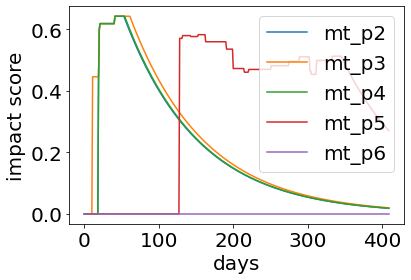

In [621]:
mt_data = pd.DataFrame(columns=["days",
                                       "mt_p2",
                                       "mt_p3",
                                       "mt_p4",
                                       "mt_p5",
                                       "mt_p6","mt_cases",
                                      




"%_change","target_conse_5"])
mt_data.days = data.days
mt_data.mt_cases = data.Montana
mt_p1 = the_day("03-12-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
mt_p2 = the_day("03-28-20")#Stay At home Policy -> 03-19-2020
mt_p3 = the_day(MT_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
mt_p4 = the_day(MT_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
mt_p5 = the_day("07-15-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
mt_p6 = the_day(MT_Q) # first vaccinationk

mt_p2_end = the_day(MT_stay_lift)  
mt_p3_end = the_day(MT_rest_lift)  
mt_p4_end = the_day(MT_buss_lift)  
mt_p5_end = the_day(MT_FM_lift)    
mt_p6_end = the_day(MT_travel_lift)

policy_day_list_mt = [mt_p1,mt_p2,mt_p3,mt_p4,mt_p5,mt_p6]
mt_data["mean_of_7"] = mt_data.mt_cases.rolling(7).mean()
mt_data["mean_of_7"].fillna(0,inplace=True)
percent_change(mt_data,state="mt")
policy_day_list_mt


# policy_difference(10, mt_p1, mt_data.days, mt_data,1, state="mt")
policy_difference(10, mt_p2, mt_p2_end, mt_data.days, mt_data,2, state="mt")
policy_difference(10, mt_p3, mt_p3_end, mt_data.days, mt_data,3, state="mt")
policy_difference(10, mt_p4, mt_p4_end, mt_data.days, mt_data,4, state="mt")
policy_difference(10, mt_p5, mt_p5_end, mt_data.days, mt_data,5, state="mt")
policy_difference(10, mt_p6, mt_p6_end, mt_data.days, mt_data,6, state="mt")
 

target_conse_5(mt_data["mean_of_7"],mt_data.target_conse_5)

mt_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()






## Nebraska (NE)

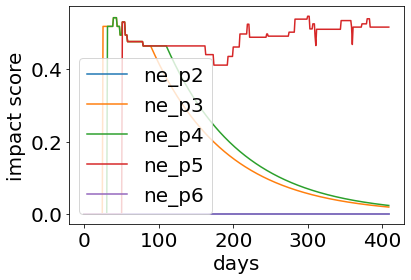

In [622]:
ne_data = pd.DataFrame(columns=["days",
                                       "ne_p2",
                                       "ne_p3",
                                       "ne_p4",
                                       "ne_p5",
                                       "ne_p6","ne_cases",
                                       




"%_change","target_conse_5"])
ne_data.days = data.days
ne_data.ne_cases = data.Nebraska
ne_p1 = the_day("03-13-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ne_p2 = the_day("")#Stay At home Policy -> 03-19-2020
ne_p3 = the_day(NE_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
ne_p4 = the_day(NE_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ne_p5 = the_day("05-04-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
ne_p6 = the_day(NE_Q) # first vaccinationk

ne_p2_end = the_day(NE_stay_lift)  
ne_p3_end = the_day(NE_rest_lift)  
ne_p4_end = the_day(NE_buss_lift)  
ne_p5_end = the_day(NE_FM_lift)    
ne_p6_end = the_day(NE_travel_lift)

policy_day_list_ne = [ne_p1,ne_p2,ne_p3,ne_p4,ne_p5,ne_p6]
ne_data["mean_of_7"] = ne_data.ne_cases.rolling(7).mean()
ne_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ne_data,state="ne")
policy_day_list_ne

# policy_difference(10, ne_p1, ne_data.days, ne_data,1, state="ne")
policy_difference(10, ne_p2, ne_p2_end, ne_data.days, ne_data,2, state="ne")
policy_difference(10, ne_p3, ne_p3_end, ne_data.days, ne_data,3, state="ne")
policy_difference(10, ne_p4, ne_p4_end, ne_data.days, ne_data,4, state="ne")
policy_difference(10, ne_p5, ne_p5_end, ne_data.days, ne_data,5, state="ne")
policy_difference(10, ne_p6, ne_p6_end, ne_data.days, ne_data,6, state="ne")
 
target_conse_5(ne_data["mean_of_7"],ne_data.target_conse_5)
ne_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()





## Nevada (NV)

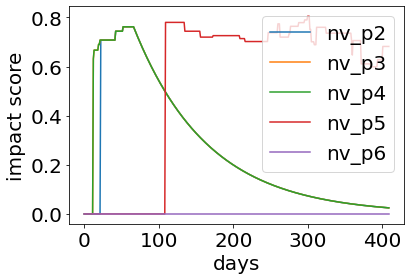

In [623]:
nv_data = pd.DataFrame(columns=["days",
                                       "nv_p2",
                                       "nv_p3",
                                       "nv_p4",
                                       "nv_p5",
                                       "nv_p6","nv_cases",
"%_change","target_conse_5"])
nv_data.days = data.days
nv_data.nv_cases = data.Nevada
nv_p1 = the_day("03-12-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
nv_p2 = the_day("03-31-20")#Stay At home Policy -> 03-19-2020
nv_p3 = the_day(NV_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
nv_p4 = the_day(NV_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
nv_p5 = the_day("06-26-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
nv_p6 = the_day(NV_Q) # first vaccinationk

nv_p2_end = the_day(NV_stay_lift)  
nv_p3_end = the_day(NV_rest_lift)  
nv_p4_end = the_day(NV_buss_lift)  
nv_p5_end = the_day(NV_FM_lift)    
nv_p6_end = the_day(NV_travel_lift)

policy_day_list_nv = [nv_p1,nv_p2,nv_p3,nv_p4,nv_p5,nv_p6]
nv_data["mean_of_7"] = nv_data.nv_cases.rolling(7).mean()
nv_data["mean_of_7"].fillna(0,inplace=True)
percent_change(nv_data,state="nv")
policy_day_list_nv

# policy_difference(10, nv_p1, nv_data.days, nv_data,1, state="nv")
policy_difference(10, nv_p2, nv_p2_end, nv_data.days, nv_data,2, state="nv")
policy_difference(10, nv_p3, nv_p3_end, nv_data.days, nv_data,3, state="nv")
policy_difference(10, nv_p4, nv_p4_end, nv_data.days, nv_data,4, state="nv")
policy_difference(10, nv_p5, nv_p5_end, nv_data.days, nv_data,5, state="nv")
policy_difference(10, nv_p6, nv_p6_end, nv_data.days, nv_data,6, state="nv")
 
target_conse_5(nv_data["mean_of_7"],nv_data.target_conse_5)

nv_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()




## New Hampshire (NH)

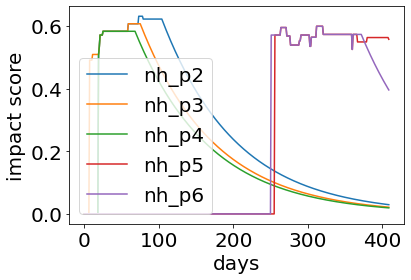

In [624]:
nh_data = pd.DataFrame(columns=["days",
                                       "nh_p2",
                                       "nh_p3",
                                       "nh_p4",
                                       "nh_p5",
                                       "nh_p6","nh_cases",
"%_change","target_conse_5"])
nh_data.days = data.days
nh_data.nh_cases= data.New_hampshire
nh_p1 = the_day("03-13-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
nh_p2 = the_day("03-28-20")#Stay At home Policy -> 03-19-2020
nh_p3 = the_day(NH_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
nh_p4 = the_day(NH_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
nh_p5 = the_day("11-20-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
nh_p6 = the_day(NH_Q) # first vaccinationk

nh_p2_end = the_day(NH_stay_lift)  
nh_p3_end = the_day(NH_rest_lift)  
nh_p4_end = the_day(NH_buss_lift)  
nh_p5_end = the_day(NH_FM_lift)    
nh_p6_end = the_day(NH_travel_lift)

policy_day_list_nh = [nh_p1,nh_p2,nh_p3,nh_p4,nh_p5,nh_p6]
nh_data["mean_of_7"] = nh_data.nh_cases.rolling(7).mean()
nh_data["mean_of_7"].fillna(0,inplace=True)
percent_change(nh_data,state="nh")
policy_day_list_nh

# policy_difference(10, nh_p1, nh_data.days, nh_data,1, state="nh")
policy_difference(10, nh_p2, nh_p2_end, nh_data.days, nh_data,2, state="nh")
policy_difference(10, nh_p3, nh_p3_end, nh_data.days, nh_data,3, state="nh")
policy_difference(10, nh_p4, nh_p4_end, nh_data.days, nh_data,4, state="nh")
policy_difference(10, nh_p5, nh_p5_end, nh_data.days, nh_data,5, state="nh")
policy_difference(10, nh_p6, nh_p6_end, nh_data.days, nh_data,6, state="nh")
 
target_conse_5(nh_data["mean_of_7"],nh_data.target_conse_5)
nh_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## New Jersey (NJ)

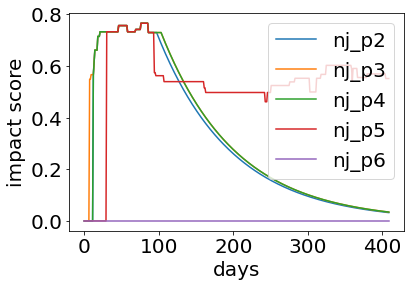

In [625]:
nj_data = pd.DataFrame(columns=["days",
                                       "nj_p2",
                                       "nj_p3",
                                       "nj_p4",
                                       "nj_p5",
                                       "nj_p6","nj_cases",
"%_change","target_conse_5"])
nj_data.days = data.days
nj_data.nj_cases = data.NJ
nj_p1 = the_day("03-09-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
nj_p2 = the_day("03-21-20")#Stay At home Policy -> 03-19-2020
nj_p3 = the_day(NJ_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
nj_p4 = the_day(NJ_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
nj_p5 = the_day("04-08-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
nj_p6 = the_day(NJ_Q) # first vaccinationk

nj_p2_end = the_day(NJ_stay_lift)  
nj_p3_end = the_day(NJ_rest_lift)  
nj_p4_end = the_day(NJ_buss_lift)  
nj_p5_end = the_day(NJ_FM_lift)    
nj_p6_end = the_day(NJ_travel_lift)

policy_day_list_nj = [nj_p1,nj_p2,nj_p3,nj_p4,nj_p5,nj_p6]
nj_data["mean_of_7"] = nj_data.nj_cases.rolling(7).mean()
nj_data["mean_of_7"].fillna(0,inplace=True)
percent_change(nj_data,state="nj")
policy_day_list_nj

# policy_difference(10, nj_p1, nj_data.days, nj_data,1, state="nj")
policy_difference(10, nj_p2, nj_p2_end, nj_data.days, nj_data,2, state="nj")
policy_difference(10, nj_p3, nj_p3_end, nj_data.days, nj_data,3, state="nj")
policy_difference(10, nj_p4, nj_p4_end, nj_data.days, nj_data,4, state="nj")
policy_difference(10, nj_p5, nj_p5_end, nj_data.days, nj_data,5, state="nj")
policy_difference(10, nj_p6, nj_p6_end, nj_data.days, nj_data,6, state="nj")
 
target_conse_5(nj_data["mean_of_7"],nj_data.target_conse_5)
nj_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## New Mexico (NM) 

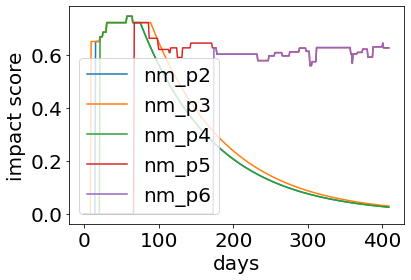

In [626]:
nm_data = pd.DataFrame(columns=["days",
                                       "nm_p2",
                                       "nm_p3",
                                       "nm_p4",
                                       "nm_p5",
                                       "nm_p6","nm_cases",
"%_change","target_conse_5"])
nm_data.days = data.days
nm_data.nm_cases = data.New_mexico
nm_p1 = the_day("03-11-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
nm_p2 = the_day("03-24-20")#Stay At home Policy -> 03-19-2020
nm_p3 = the_day(NC_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
nm_p4 = the_day(NC_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
nm_p5 = the_day("05-15-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
nm_p6 = the_day(NM_Q) # first vaccinationk

nm_p2_end = the_day(MN_stay_lift)  
nm_p3_end = the_day(MN_rest_lift)  
nm_p4_end = the_day(MN_buss_lift)  
nm_p5_end = the_day(MN_FM_lift)    
nm_p6_end = the_day(MN_travel_lift)

policy_day_list_nm = [nm_p1,nm_p2,nm_p3,nm_p4,nm_p5,nm_p6]
nm_data["mean_of_7"] = nm_data.nm_cases.rolling(7).mean()
nm_data["mean_of_7"].fillna(0,inplace=True)
percent_change(nm_data,state="nm")
policy_day_list_nm

# policy_difference(10, nm_p1, nm_data.days, nm_data,1, state="nm")
policy_difference(10, nm_p2,  nm_p2_end, nm_data.days, nm_data,2, state="nm")
policy_difference(10, nm_p3,  nm_p3_end, nm_data.days, nm_data,3, state="nm")
policy_difference(10, nm_p4,  nm_p4_end, nm_data.days, nm_data,4, state="nm")
policy_difference(10, nm_p5,  nm_p5_end, nm_data.days, nm_data,5, state="nm")
policy_difference(10, nm_p6,  nm_p6_end, nm_data.days, nm_data,6, state="nm")
 
target_conse_5(nm_data["mean_of_7"],nm_data.target_conse_5)
nm_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## New York (NY)

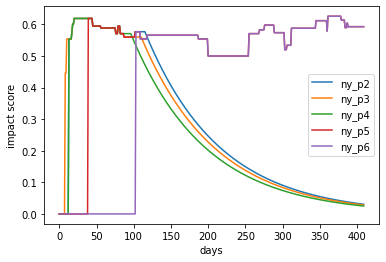

In [44]:
ny_data = pd.DataFrame(columns=["days",
                                       "ny_p2",
                                       "ny_p3",
                                       "ny_p4",
                                       "ny_p5",
                                       "ny_p6","ny_cases"
,"%_change","target_conse_5"])
ny_data.days = data.days
ny_data.ny_cases = data.NYC
ny_p1 = the_day("03-07-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ny_p2 = the_day("03-22-20")#Stay At home Policy -> 03-19-2020
ny_p3 = the_day(NY_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
ny_p4 = the_day(NY_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ny_p5 = the_day("04-17-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
ny_p6 = the_day(NY_Q) # first vaccinationk

ny_p2_end = the_day(NY_stay_lift)  
ny_p3_end = the_day(NY_rest_lift)  
ny_p4_end = the_day(NY_buss_lift)  
ny_p5_end = the_day(NY_FM_lift)    
ny_p6_end = the_day(NY_travel_lift)

policy_day_list_ny = [ny_p1,ny_p2,ny_p3,ny_p4,ny_p5,ny_p6]
ny_data["mean_of_7"] = ny_data.ny_cases.rolling(7).mean()
ny_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ny_data,state="ny")
policy_day_list_ny

# policy_difference(10, ny_p1, ny_data.days, ny_data,1, state="ny")
policy_difference(10, ny_p2, ny_p2_end, ny_data.days, ny_data,2, state="ny")
policy_difference(10, ny_p3, ny_p3_end, ny_data.days, ny_data,3, state="ny")
policy_difference(10, ny_p4, ny_p4_end, ny_data.days, ny_data,4, state="ny")
policy_difference(10, ny_p5, ny_p5_end, ny_data.days, ny_data,5, state="ny")
policy_difference(10, ny_p6, ny_p6_end, ny_data.days, ny_data,6, state="ny")
 
target_conse_5(ny_data["mean_of_7"],ny_data.target_conse_5)
ny_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## North Carolina (NC)

In [628]:
# nc_data = pd.DataFrame(columns=["days",
#                                        "nc_p2",
#                                        "nc_p3",
#                                        "nc_p4",
#                                        "nc_p5",
#                                        "nc_p6","nc_cases",
#                                        "%_change",
# "target_conse_5"])
# nc_data.days = data.days
# nc_data.nc_cases = data.NC
# nc_p1 = the_day("03-10-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
# nc_p2 = the_day("03-30-20")#Stay At home Policy -> 03-19-2020
# nc_p3 = the_day(NC_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
# nc_p4 = the_day(NC_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
# nc_p5 = the_day("06-26-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
# nc_p6 = the_day("") # first vaccinationk

# nc_p2_end = the_day(NC_stay_lift)  
# nc_p3_end = the_day(NC_rest_lift)  
# nc_p4_end = the_day(NC_buss_lift)  
# nc_p5_end = the_day(NC_FM_lift)    
# nc_p6_end = the_day(NC_travel_lift)


# # policy_difference(10, nc_p1, nc_p1_end, nc_data.days, nc_data,1, state="nc")
# policy_difference(10, nc_p2, nc_p2_end, nc_data.days, nc_data,2, state="nc")
# policy_difference(10, nc_p3, nc_p3_end, nc_data.days, nc_data,3, state="nc")
# policy_difference(10, nc_p4, nc_p4_end, nc_data.days, nc_data,4, state="nc")
# policy_difference(10, nc_p5, nc_p5_end, nc_data.days, nc_data,5, state="nc")
# policy_difference(10, nc_p6, nc_p6_end, nc_data.days, nc_data,6, state="nc")
 
# target_conse_5(nc_data["mean_of_7"],nc_data.target_conse_5)
# nc_data.iloc[:,1:6].plot()
# plt.xlabel("days")
# plt.ylabel("impact score")
# plt.show()


## North Dakota (ND)

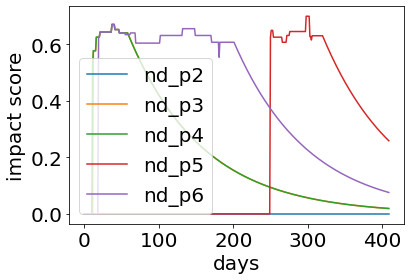

In [629]:
nd_data = pd.DataFrame(columns=["days",
                                       "nd_p2",
                                       "nd_p3",
                                       "nd_p4",
                                       "nd_p5",
                                       "nd_p6","nd_cases",
"%_change","target_conse_5"])
nd_data.days = data.days
nd_data.nd_cases = data.North_dakota
nd_p1 = the_day("03-13-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
nd_p2 = the_day("")#Stay At home Policy -> 03-19-2020
nd_p3 = the_day(ND_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
nd_p4 = the_day(ND_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
nd_p5 = the_day("11-14-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
nd_p6 = the_day(ND_Q) # first vaccinationk

nd_p2_end = the_day(ND_stay_lift)  
nd_p3_end = the_day(ND_rest_lift)  
nd_p4_end = the_day(ND_buss_lift)  
nd_p5_end = the_day(ND_FM_lift)    
nd_p6_end = the_day(ND_travel_lift)

policy_day_list_nd = [nd_p1,nd_p2,nd_p3,nd_p4,nd_p5,nd_p6]
nd_data["mean_of_7"] = nd_data.nd_cases.rolling(7).mean()
nd_data["mean_of_7"].fillna(0,inplace=True)
percent_change(nd_data,state="nd")
policy_day_list_nd

# policy_difference(10, nd_p1, nd_data.days, nd_data,1, state="nd")
policy_difference(10, nd_p2, nd_p2_end, nd_data.days, nd_data,2, state="nd")
policy_difference(10, nd_p3, nd_p3_end, nd_data.days, nd_data,3, state="nd")
policy_difference(10, nd_p4, nd_p4_end, nd_data.days, nd_data,4, state="nd")
policy_difference(10, nd_p5, nd_p5_end, nd_data.days, nd_data,5, state="nd")
policy_difference(10, nd_p6, nd_p6_end, nd_data.days, nd_data,6, state="nd")
 
target_conse_5(nd_data["mean_of_7"],nd_data.target_conse_5)
nd_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()



In [630]:
policy_day_list_nd = [nd_p2,nd_p3,nd_p4,nd_p5,nd_p6]
policy_day_list_nd_end = [nd_p2_end,nd_p3_end,nd_p4_end,nd_p5_end,nd_p6_end]
print(policy_day_list_nd)
print(policy_day_list_nd_end)

[0, 8, 7, 246, 15]
[0, 49, 49, 311, 192]


## Ohio (OH)

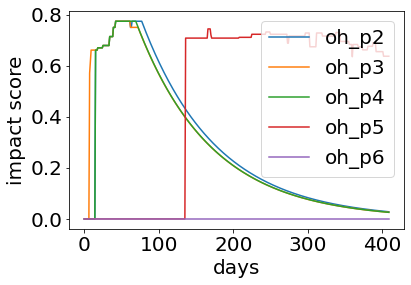

In [631]:
oh_data = pd.DataFrame(columns=["days",
                                       "oh_p2",
                                       "oh_p3",
                                       "oh_p4",
                                       "oh_p5",
                                       "oh_p6","oh_cases"
,"%_change","target_conse_5"])
oh_data.days = data.days
oh_data.oh_cases = data.Ohio
oh_p1 = the_day("03-09-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
oh_p2 = the_day("03-24-20")#Stay At home Policy -> 03-19-2020
oh_p3 = the_day(OH_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
oh_p4 = the_day(OH_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
oh_p5 = the_day("07-23-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
oh_p6 = the_day(OH_Q) # first vaccinationk

oh_p2_end = the_day(OH_stay_lift)  
oh_p3_end = the_day(OH_rest_lift)  
oh_p4_end = the_day(OH_buss_lift)  
oh_p5_end = the_day(OH_FM_lift)    
oh_p6_end = the_day(OH_travel_lift)

policy_day_list_oh = [oh_p1,oh_p2,oh_p3,oh_p4,oh_p5,oh_p6]
oh_data["mean_of_7"] = oh_data.oh_cases.rolling(7).mean()
oh_data["mean_of_7"].fillna(0,inplace=True)
percent_change(oh_data,state="oh")
policy_day_list_oh

# policy_difference(10, oh_p1, oh_data.days, oh_data,1, state="oh")
policy_difference(10, oh_p2, oh_p2_end, oh_data.days, oh_data,2, state="oh")
policy_difference(10, oh_p3, oh_p3_end, oh_data.days, oh_data,3, state="oh")
policy_difference(10, oh_p4, oh_p4_end, oh_data.days, oh_data,4, state="oh")
policy_difference(10, oh_p5, oh_p5_end, oh_data.days, oh_data,5, state="oh")
policy_difference(10, oh_p6, oh_p6_end, oh_data.days, oh_data,6, state="oh")
 
target_conse_5(oh_data["mean_of_7"],oh_data.target_conse_5)
oh_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## Oklahoma (OK)

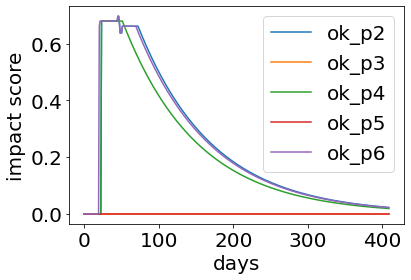

In [632]:
ok_data = pd.DataFrame(columns=["days",
                                       "ok_p2",
                                       "ok_p3",
                                       "ok_p4",
                                       "ok_p5",
                                       "ok_p6","ok_cases",
"%_change","target_conse_5"])
ok_data.days = data.days
ok_data.ok_cases = data.Oklahoma
ok_p1 = the_day("03-15-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ok_p2 = the_day("04-01-20")#Stay At home Policy -> 03-19-2020
ok_p3 = the_day(OK_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
ok_p4 = the_day(OK_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ok_p5 = the_day("") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
ok_p6 = the_day(OK_Q) # first vaccinationk

ok_p2_end = the_day(OK_stay_lift)  
ok_p3_end = the_day(OK_rest_lift)  
ok_p4_end = the_day(OK_buss_lift)  
ok_p5_end = the_day(OK_FM_lift)    
ok_p6_end = the_day(OK_travel_lift)

policy_day_list_ok = [ok_p2,ok_p3,ok_p4,ok_p5,ok_p6]
policy_day_list_ok_end = [ok_p2_end,ok_p3_end,ok_p4_end,ok_p5_end,ok_p6_end]

ok_data["mean_of_7"] = ok_data.ok_cases.rolling(7).mean()
ok_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ok_data,state="ok")
policy_day_list_ok

# policy_difference(10, ok_p1, ok_data.days, ok_data,1, state="ok")
policy_difference(10, ok_p2, ok_p2_end, ok_data.days, ok_data,2, state="ok")
policy_difference(10, ok_p3, ok_p3_end, ok_data.days, ok_data,3, state="ok")
policy_difference(10, ok_p4, ok_p4_end, ok_data.days, ok_data,4, state="ok")
policy_difference(10, ok_p5, ok_p5_end, ok_data.days, ok_data,5, state="ok")
policy_difference(10, ok_p6, ok_p6_end, ok_data.days, ok_data,6, state="ok")
 
target_conse_5(ok_data["mean_of_7"],ok_data.target_conse_5)
ok_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()



In [633]:
print(policy_day_list_ok)
print(policy_day_list_ok_end)


[19, 0, 19, 0, 16]
[63, 49, 42, 0, 60]


## Oregon (OR)

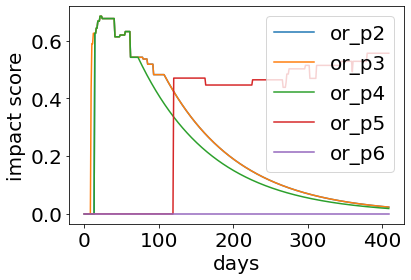

In [634]:
or_data = pd.DataFrame(columns=["days",
                                       "or_p2",
                                       "or_p3",
                                       "or_p4",
                                       "or_p5",
                                       "or_p6","or_cases",
"%_change","target_conse_5"])
or_data.days = data.days
or_data.or_cases = data.Oregon
or_p1 = the_day("03-08-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
or_p2 = the_day("03-23-20")#Stay At home Policy -> 03-19-2020
or_p3 = the_day(OR_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
or_p4 = the_day(OR_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
or_p5 = the_day("07-07-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
or_p6 = the_day(OR_Q) # first vaccinationk

or_p2_end = the_day(OR_stay_lift)  
or_p3_end = the_day(OR_rest_lift)  
or_p4_end = the_day(OR_buss_lift)  
or_p5_end = the_day(OR_FM_lift)    
or_p6_end = the_day(OR_travel_lift)

policy_day_list_or = [or_p1,or_p2,or_p3,or_p4,or_p5,or_p6]
or_data["mean_of_7"] = or_data.or_cases.rolling(7).mean()
or_data["mean_of_7"].fillna(0,inplace=True)
percent_change(or_data,state="or")
policy_day_list_or

# policy_difference(10, or_p1, or_data.days, or_data,1, state="or")
policy_difference(10, or_p2, or_p2_end, or_data.days, or_data,2, state="or")
policy_difference(10, or_p3, or_p3_end, or_data.days, or_data,3, state="or")
policy_difference(10, or_p4, or_p4_end, or_data.days, or_data,4, state="or")
policy_difference(10, or_p5, or_p5_end, or_data.days, or_data,5, state="or")
policy_difference(10, or_p6, or_p6_end, or_data.days, or_data,6, state="or")
 
target_conse_5(or_data["mean_of_7"],or_data.target_conse_5)
or_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## Pennsylvania (PA)

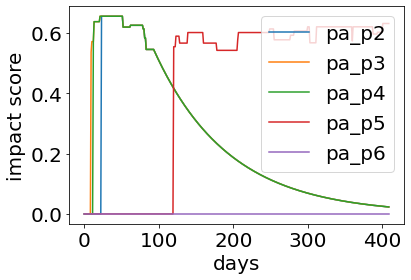

In [635]:
pa_data = pd.DataFrame(columns=["days",
                                       "pa_p2",
                                       "pa_p3",
                                       "pa_p4",
                                       "pa_p5",
                                       "pa_p6","pa_cases",
"%_change","target_conse_5"])
pa_data.days = data.days
pa_data.pa_cases = data.Penn
pa_p1 = the_day("03-06-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
pa_p2 = the_day("04-01-20")#Stay At home Policy -> 03-19-2020
pa_p3 = the_day(PA_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
pa_p4 = the_day(PA_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
pa_p5 = the_day("07-07-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
pa_p6 = the_day(PA_Q) # first vaccinationk

pa_p2_end = the_day(PA_stay_lift)  
pa_p3_end = the_day(PA_rest_lift)  
pa_p4_end = the_day(PA_buss_lift)  
pa_p5_end = the_day(PA_FM_lift)    
pa_p6_end = the_day(PA_travel_lift)

policy_day_list_pa = [pa_p1,pa_p2,pa_p3,pa_p4,pa_p5,pa_p6]
pa_data["mean_of_7"] = pa_data.pa_cases.rolling(7).mean()
pa_data["mean_of_7"].fillna(0,inplace=True)
percent_change(pa_data,state="pa")
policy_day_list_pa

# policy_difference(10, pa_p1, pa_data.days, pa_data,1, state="pa")
policy_difference(10, pa_p2, pa_p2_end, pa_data.days, pa_data,2, state="pa")
policy_difference(10, pa_p3, pa_p3_end, pa_data.days, pa_data,3, state="pa")
policy_difference(10, pa_p4, pa_p4_end, pa_data.days, pa_data,4, state="pa")
policy_difference(10, pa_p5, pa_p5_end, pa_data.days, pa_data,5, state="pa")
policy_difference(10, pa_p6, pa_p6_end, pa_data.days, pa_data,6, state="pa")
 
target_conse_5(pa_data["mean_of_7"],pa_data.target_conse_5)
pa_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## Rhode Island (RI)

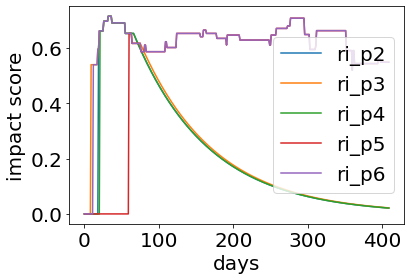

In [636]:
ri_data = pd.DataFrame(columns=["days",
                                       "ri_p2",
                                       "ri_p3",
                                       "ri_p4",
                                       "ri_p5",
                                       "ri_p6","ri_cases",
"%_change","target_conse_5"])
ri_data.days = data.days
ri_data.ri_cases = data.Rhode_Island
ri_p1 = the_day("03-09-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ri_p2 = the_day("03-28-20")#Stay At home Policy -> 03-19-2020
ri_p3 = the_day(RI_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
ri_p4 = the_day(RI_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ri_p5 = the_day("05-08-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
ri_p6 = the_day(RI_Q) # first vaccinationk

ri_p2_end = the_day(RI_stay_lift)  
ri_p3_end = the_day(RI_rest_lift)  
ri_p4_end = the_day(RI_buss_lift)  
ri_p5_end = the_day(RI_FM_lift)    
ri_p6_end = the_day(RI_travel_lift)

policy_day_list_ri = [ri_p1,ri_p2,ri_p3,ri_p4,ri_p5,ri_p6]
ri_data["mean_of_7"] = ri_data.ri_cases.rolling(7).mean()
ri_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ri_data,state="ri")
policy_day_list_ri

# policy_difference(10, ri_p1, ri_data.days, ri_data,1, state="ri")
policy_difference(10, ri_p2, ri_p2_end, ri_data.days, ri_data,2, state="ri")
policy_difference(10, ri_p3, ri_p3_end, ri_data.days, ri_data,3, state="ri")
policy_difference(10, ri_p4, ri_p4_end, ri_data.days, ri_data,4, state="ri")
policy_difference(10, ri_p5, ri_p5_end, ri_data.days, ri_data,5, state="ri")
policy_difference(10, ri_p6, ri_p6_end, ri_data.days, ri_data,6, state="ri")
 
target_conse_5(ri_data["mean_of_7"],ri_data.target_conse_5)
ri_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## South Carolina (SC)

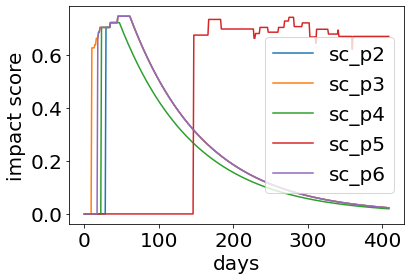

In [637]:
sc_data = pd.DataFrame(columns=["days",
                                       "sc_p2",
                                       "sc_p3",
                                       "sc_p4",
                                       "sc_p5",
                                       "sc_p6","sc_cases",
"%_change","target_conse_5"])
sc_data.days = data.days
sc_data.sc_cases = data.South_Carolina
sc_p1 = the_day("03-13-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
sc_p2 = the_day("04-07-20")#Stay At home Policy -> 03-19-2020
sc_p3 = the_day(SC_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
sc_p4 = the_day(SC_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
sc_p5 = the_day("08-03-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
sc_p6 = the_day(SC_Q) # first vaccinationk

sc_p2_end = the_day(SC_stay_lift)  
sc_p3_end = the_day(SC_rest_lift)  
sc_p4_end = the_day(SC_buss_lift)  
sc_p5_end = the_day(SC_FM_lift)    
sc_p6_end = the_day(SC_travel_lift)

policy_day_list_sc = [sc_p1,sc_p2,sc_p3,sc_p4,sc_p5,sc_p6]
sc_data["mean_of_7"] = sc_data.sc_cases.rolling(7).mean()
sc_data["mean_of_7"].fillna(0,inplace=True)
percent_change(sc_data,state="sc")
policy_day_list_sc

# policy_difference(10, sc_p1, sc_data.days, sc_data,1, state="sc")
policy_difference(10, sc_p2, sc_p2_end, sc_data.days, sc_data,2, state="sc")
policy_difference(10, sc_p3, sc_p3_end, sc_data.days, sc_data,3, state="sc")
policy_difference(10, sc_p4, sc_p4_end, sc_data.days, sc_data,4, state="sc")
policy_difference(10, sc_p5, sc_p5_end, sc_data.days, sc_data,5, state="sc")
policy_difference(10, sc_p6, sc_p6_end, sc_data.days, sc_data,6, state="sc")

target_conse_5(sc_data["mean_of_7"],sc_data.target_conse_5)
sc_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## South Dakota (SD)

In [638]:
# sd_data = pd.DataFrame(columns=["days",
#                                        "sd_p2",
#                                        "sd_p3",
#                                        "sd_p4",
#                                        "sd_p5",
#                                        "sd_p6","sd_cases",
# "%_change","target_conse_5"])
# sd_data.days = data.days
# sd_data.sd_cases = data.South_dakota
# sd_p1 = the_day("03-13-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
# sd_p2 = the_day("04-02-20")#Stay At home Policy -> 03-19-2020
# sd_p3 = the_day(SD_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
# sd_p4 = the_day(SD_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
# sd_p5 = the_day("") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
# sd_p6 = the_day(SD_Q) # first vaccinationk

# sd_p2_end = the_day(SD_stay_lift)  
# sd_p3_end = the_day(SD_rest_lift)  
# sd_p4_end = the_day(SD_buss_lift)  
# sd_p5_end = the_day(SD_FM_lift)    
# sd_p6_end = the_day(SD_travel_lift)

# policy_day_list_sd = [sd_p2,sd_p3,sd_p4,sd_p5,sd_p6]
# policy_day_list_sd_end = [sd_p2_end,sd_p3_end,sd_p4_end,sd_p5_end,sd_p6_end]

# sd_data["mean_of_7"] = sd_data.sd_cases.rolling(7).mean()
# sd_data["mean_of_7"].fillna(0,inplace=True)
# percent_change(sd_data,state="sd")
# policy_day_list_sd

# # policy_difference(10, sd_p1, sd_data.days, sd_data,1, state="sd")
# policy_difference(10, sd_p2, sd_p2_end, sd_data.days, sd_data,2, state="sd")
# policy_difference(10, sd_p3, sd_p3_end, sd_data.days, sd_data,3, state="sd")
# policy_difference(10, sd_p4, sd_p4_end, sd_data.days, sd_data,4, state="sd")
# policy_difference(10, sd_p5, sd_p5_end, sd_data.days, sd_data,5, state="sd")
# policy_difference(10, sd_p6, sd_p6_end, sd_data.days, sd_data,6, state="sd")
 
# target_conse_5(sd_data["mean_of_7"],sd_data.target_conse_5)
# sd_data.iloc[:,1:6].plot()
# plt.xlabel("days")
# plt.ylabel("impact score")
# plt.show()


## Tennessee (TN)

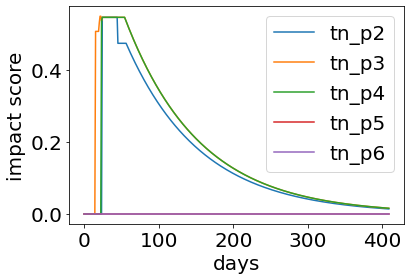

In [639]:
tn_data = pd.DataFrame(columns=["days",
                                       "tn_p2",
                                       "tn_p3",
                                       "tn_p4",
                                       "tn_p5",
                                       "tn_p6","tn_cases",
"%_change","target_conse_5"])
tn_data.days = data.days
tn_data.tn_cases = data.Tennessee
tn_p1 = the_day("03-12-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
tn_p2 = the_day("04-02-20")#Stay At home Policy -> 03-19-2020
tn_p3 = the_day(TN_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
tn_p4 = the_day(TN_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
tn_p5 = the_day("") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
tn_p6 = the_day(TN_Q) # first vaccinationk

tn_p2_end = the_day(TN_stay_lift)  
tn_p3_end = the_day(TN_rest_lift)  
tn_p4_end = the_day(TN_buss_lift)  
tn_p5_end = the_day(TN_FM_lift)    
tn_p6_end = the_day(TN_travel_lift)

policy_day_list_tn = [tn_p1,tn_p2,tn_p3,tn_p4,tn_p5,tn_p6]
tn_data["mean_of_7"] = tn_data.tn_cases.rolling(7).mean()
tn_data["mean_of_7"].fillna(0,inplace=True)
percent_change(tn_data,state="tn")
policy_day_list_tn

# policy_difference(10, tn_p1, tn_data.days, tn_data,1, state="tn")
policy_difference(10, tn_p2, tn_p2_end, tn_data.days, tn_data,2, state="tn")
policy_difference(10, tn_p3, tn_p3_end, tn_data.days, tn_data,3, state="tn")
policy_difference(10, tn_p4, tn_p4_end, tn_data.days, tn_data,4, state="tn")
policy_difference(10, tn_p5, tn_p5_end, tn_data.days, tn_data,5, state="tn")
policy_difference(10, tn_p6, tn_p6_end, tn_data.days, tn_data,6, state="tn")
 
target_conse_5(tn_data["mean_of_7"],tn_data.target_conse_5)
tn_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## Texas (TX)

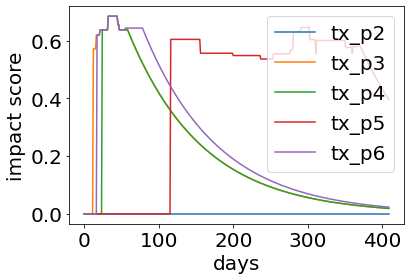

In [640]:
tx_data = pd.DataFrame(columns=["days",
                                       "tx_p2",
                                       "tx_p3",
                                       "tx_p4",
                                       "tx_p5",
                                       "tx_p6","tx_cases",
"%_change","target_conse_5"])
tx_data.days = data.days
tx_data.tx_cases = data.Texas
tx_p1 = the_day("03-13-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
tx_p2 = the_day("")#Stay At home Policy -> 03-19-2020
tx_p3 = the_day(TX_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
tx_p4 = the_day(TX_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
tx_p5 = the_day("07-03-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
tx_p6 = the_day(TX_Q) # first vaccinationk

tx_p2_end = the_day(TX_stay_lift)  
tx_p3_end = the_day(TX_rest_lift)  
tx_p4_end = the_day(TX_buss_lift)  
tx_p5_end = the_day(TX_FM_lift)    
tx_p6_end = the_day(TX_travel_lift)

policy_day_list_tx = [tx_p1,tx_p2,tx_p3,tx_p4,tx_p5,tx_p6]
tx_data["mean_of_7"] = tx_data.tx_cases.rolling(7).mean()
tx_data["mean_of_7"].fillna(0,inplace=True)
percent_change(tx_data,state="tx")
policy_day_list_tx

# policy_difference(10, tx_p1, tx_data.days, tx_data,1, state="tx")
policy_difference(10, tx_p2, tx_p2_end, tx_data.days, tx_data,2, state="tx")
policy_difference(10, tx_p3, tx_p3_end, tx_data.days, tx_data,3, state="tx")
policy_difference(10, tx_p4, tx_p4_end, tx_data.days, tx_data,4, state="tx")
policy_difference(10, tx_p5, tx_p5_end, tx_data.days, tx_data,5, state="tx")
policy_difference(10, tx_p6, tx_p6_end, tx_data.days, tx_data,6, state="tx")
 
target_conse_5(tx_data["mean_of_7"],tx_data.target_conse_5)
tx_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## Utah (UT)

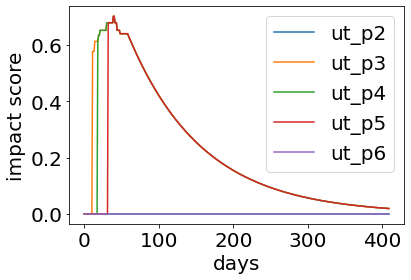

In [641]:
ut_data = pd.DataFrame(columns=["days",
                                       "ut_p2",
                                       "ut_p3",
                                       "ut_p4",
                                       "ut_p5",
                                       "ut_p6","ut_cases",
"%_change","target_conse_5"])
ut_data.days = data.days
ut_data.ut_cases =data.Utah
ut_p1 = the_day("03-06-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
ut_p2 = the_day("")#Stay At home Policy -> 03-19-2020
ut_p3 = the_day(UT_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
ut_p4 = the_day(UT_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
ut_p5 = the_day("04-10-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
ut_p6 = the_day(UT_Q) # first vaccinationk

ut_p2_end = the_day(UT_stay_lift)  
ut_p3_end = the_day(UT_rest_lift)  
ut_p4_end = the_day(UT_buss_lift)  
ut_p5_end = the_day(UT_FM_lift)    
ut_p6_end = the_day(UT_travel_lift)


policy_day_list_ut = [ut_p1,ut_p2,ut_p3,ut_p4,ut_p5,ut_p6]
ut_data["mean_of_7"] = ut_data.ut_cases.rolling(7).mean()
ut_data["mean_of_7"].fillna(0,inplace=True)
percent_change(ut_data,state="ut")
policy_day_list_ut

# policy_difference(10, ut_p1, ut_data.days, ut_data,1, state="ut")
policy_difference(10, ut_p2, ut_p2_end, ut_data.days, ut_data,2, state="ut")
policy_difference(10, ut_p3, ut_p3_end, ut_data.days, ut_data,3, state="ut")
policy_difference(10, ut_p4, ut_p4_end, ut_data.days, ut_data,4, state="ut")
policy_difference(10, ut_p5, ut_p5_end, ut_data.days, ut_data,5, state="ut")
policy_difference(10, ut_p6, ut_p6_end, ut_data.days, ut_data,6, state="ut")
 
target_conse_5(ut_data["mean_of_7"],ut_data.target_conse_5)
ut_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## Vermont (VT)

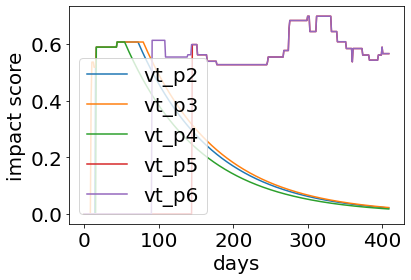

In [642]:
vt_data = pd.DataFrame(columns=["days",
                                       "vt_p2",
                                       "vt_p3",
                                       "vt_p4",
                                       "vt_p5",
                                       "vt_p6","vt_cases",
"%_change","target_conse_5"])
vt_data.days = data.days
vt_data.vt_cases = data.Vermont
vt_p1 = the_day("03-13-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
vt_p2 = the_day("03-24-20")#Stay At home Policy -> 03-19-2020
vt_p3 = the_day(VT_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
vt_p4 = the_day(VT_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
vt_p5 = the_day("08-01-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
vt_p6 = the_day(VT_Q) # first vaccinationk

vt_p2_end = the_day(VT_stay_lift)  
vt_p3_end = the_day(VT_rest_lift)  
vt_p4_end = the_day(VT_buss_lift)  
vt_p5_end = the_day(VT_FM_lift)    
vt_p6_end = the_day(VT_travel_lift)


policy_day_list_vt = [vt_p1,vt_p2,vt_p3,vt_p4,vt_p5,vt_p6]
vt_data["mean_of_7"] = vt_data.vt_cases.rolling(7).mean()
vt_data["mean_of_7"].fillna(0,inplace=True)
percent_change(vt_data,state="vt")
policy_day_list_vt

# policy_difference(10, vt_p1, vt_data.days, vt_data,1, state="vt")
policy_difference(10, vt_p2, vt_p2_end, vt_data.days, vt_data,2, state="vt")
policy_difference(10, vt_p3, vt_p3_end, vt_data.days, vt_data,3, state="vt")
policy_difference(10, vt_p4, vt_p4_end, vt_data.days, vt_data,4, state="vt")
policy_difference(10, vt_p5, vt_p5_end, vt_data.days, vt_data,5, state="vt")
policy_difference(10, vt_p6, vt_p6_end, vt_data.days, vt_data,6, state="vt")
 
target_conse_5(vt_data["mean_of_7"],vt_data.target_conse_5)
vt_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## Virginia (VA)

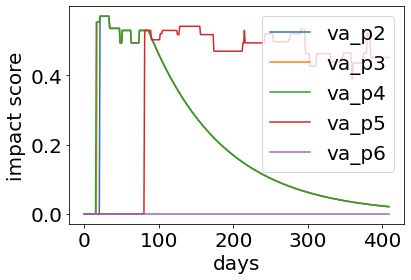

In [643]:
va_data = pd.DataFrame(columns=["days",
                                       "va_p2",
                                       "va_p3",
                                       "va_p4",
                                       "va_p5",
                                       "va_p6","va_cases",
"%_change","target_conse_5"])
va_data.days = data.days
va_data.va_cases = data.Virginia
va_p1 = the_day("03-12-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
va_p2 = the_day("03-30-20")#Stay At home Policy -> 03-19-2020
va_p3 = the_day(VA_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
va_p4 = the_day(VA_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
va_p5 = the_day("05-29-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
va_p6 = the_day(VA_Q) # first vaccinationk

va_p2_end = the_day(VA_stay_lift)  
va_p3_end = the_day(VA_rest_lift)  
va_p4_end = the_day(VA_buss_lift)  
va_p5_end = the_day(VA_FM_lift)    
va_p6_end = the_day(VA_travel_lift)


policy_day_list_va = [va_p1,va_p2,va_p3,va_p4,va_p5,va_p6]
va_data["mean_of_7"] = va_data.va_cases.rolling(7).mean()
va_data["mean_of_7"].fillna(0,inplace=True)
percent_change(va_data,state="va")
policy_day_list_va

# policy_difference(10, va_p1, va_data.days, va_data,1, state="va")
policy_difference(10, va_p2, va_p2_end, va_data.days, va_data,2, state="va")
policy_difference(10, va_p3, va_p3_end, va_data.days, va_data,3, state="va")
policy_difference(10, va_p4, va_p4_end, va_data.days, va_data,4, state="va")
policy_difference(10, va_p5, va_p5_end, va_data.days, va_data,5, state="va")
policy_difference(10, va_p6, va_p6_end, va_data.days, va_data,6, state="va")
 
target_conse_5(va_data["mean_of_7"],va_data.target_conse_5)
va_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()




## Washington (WA)

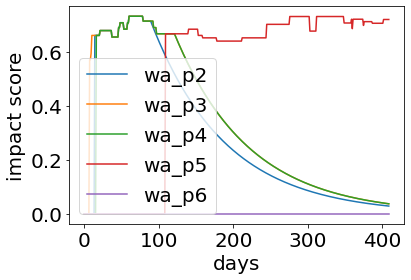

In [644]:
wa_data = pd.DataFrame(columns=["days",
                                       "wa_p2",
                                       "wa_p3",
                                       "wa_p4",
                                       "wa_p5",
                                       "wa_p6","wa_cases",
"%_change","target_conse_5"])
wa_data.days = data.days
wa_data.wa_cases = data.Washington
wa_p1 = the_day("02-29-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
wa_p2 = the_day("03-23-20")#Stay At home Policy -> 03-19-2020
wa_p3 = the_day(WA_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
wa_p4 = the_day(WA_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
wa_p5 = the_day("06-26-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
wa_p6 = the_day(WA_Q) # first vaccinationk

wa_p2_end = the_day(WA_stay_lift)  
wa_p3_end = the_day(WA_rest_lift)  
wa_p4_end = the_day(WA_buss_lift)  
wa_p5_end = the_day(WA_FM_lift)    
wa_p6_end = the_day(WA_travel_lift)


policy_day_list_wa = [wa_p1,wa_p2,wa_p3,wa_p4,wa_p5,wa_p6]
wa_data["mean_of_7"] = wa_data.wa_cases.rolling(7).mean()
wa_data["mean_of_7"].fillna(0,inplace=True)
percent_change(wa_data,state="wa")
policy_day_list_wa

# policy_difference(10, wa_p1, wa_data.days, wa_data,1, state="wa")
policy_difference(10, wa_p2, wa_p2_end, wa_data.days, wa_data,2, state="wa")
policy_difference(10, wa_p3, wa_p3_end, wa_data.days, wa_data,3, state="wa")
policy_difference(10, wa_p4, wa_p4_end, wa_data.days, wa_data,4, state="wa")
policy_difference(10, wa_p5, wa_p5_end, wa_data.days, wa_data,5, state="wa")
policy_difference(10, wa_p6, wa_p6_end, wa_data.days, wa_data,6, state="wa")
 
target_conse_5(wa_data["mean_of_7"],wa_data.target_conse_5)
wa_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## West Virginia (WV)

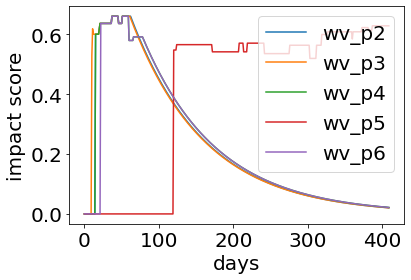

In [645]:
wv_data = pd.DataFrame(columns=["days",
                                       "wv_p2",
                                       "wv_p3",
                                       "wv_p4",
                                       "wv_p5",
                                       "wv_p6","wv_cases",
"%_change","target_conse_5"])
wv_data.days = data.days
wv_data.wv_cases =data.West_virginia
wv_p1 = the_day("03-16-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
wv_p2 = the_day("03-24-20")#Stay At home Policy -> 03-19-2020
wv_p3 = the_day(WV_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
wv_p4 = the_day(WV_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
wv_p5 = the_day("07-07-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
wv_p6 = the_day(WV_Q) # first vaccinationk

wv_p2_end = the_day(WV_stay_lift)  
wv_p3_end = the_day(WV_rest_lift)  
wv_p4_end = the_day(WV_buss_lift)  
wv_p5_end = the_day(WV_FM_lift)    
wv_p6_end = the_day(WV_travel_lift)


policy_day_list_wv = [wv_p1,wv_p2,wv_p3,wv_p4,wv_p5,wv_p6]
wv_data["mean_of_7"] = wv_data.wv_cases.rolling(7).mean()
wv_data["mean_of_7"].fillna(0,inplace=True)
percent_change(wv_data,state="wv")
policy_day_list_wv

# policy_difference(10, wv_p1, wv_data.days, wv_data,1, state="wv")
policy_difference(10, wv_p2, wv_p2_end, wv_data.days, wv_data,2, state="wv")
policy_difference(10, wv_p3, wv_p3_end, wv_data.days, wv_data,3, state="wv")
policy_difference(10, wv_p4, wv_p4_end, wv_data.days, wv_data,4, state="wv")
policy_difference(10, wv_p5, wv_p5_end, wv_data.days, wv_data,5, state="wv")
policy_difference(10, wv_p6, wv_p6_end, wv_data.days, wv_data,6, state="wv")
 
target_conse_5(wv_data["mean_of_7"],wv_data.target_conse_5)
wv_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## Wisconsin (WI)

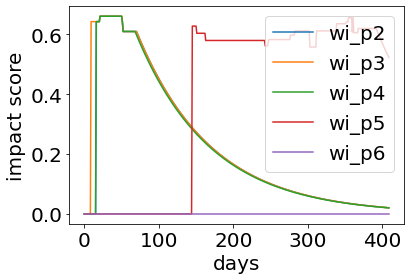

In [646]:
wi_data = pd.DataFrame(columns=["days",
                                       "wi_p2",
                                       "wi_p3",
                                       "wi_p4",
                                       "wi_p5",
                                       "wi_p6","wi_cases",
"%_change","target_conse_5"])
wi_data.days = data.days
wi_data.wi_cases = data.Wisconsin
wi_p1 = the_day("03-12-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
wi_p2 = the_day("03-25-20")#Stay At home Policy -> 03-19-2020
wi_p3 = the_day(WI_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
wi_p4 = the_day(WI_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
wi_p5 = the_day("08-01-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
wi_p6 = the_day(WI_Q) # first vaccinationk

wi_p2_end = the_day(WI_stay_lift)  
wi_p3_end = the_day(WI_rest_lift)  
wi_p4_end = the_day(WI_buss_lift)  
wi_p5_end = the_day(WI_FM_lift)    
wi_p6_end = the_day(WI_travel_lift)


policy_day_list_wi = [wi_p1,wi_p2,wi_p3,wi_p4,wi_p5,wi_p6]
wi_data["mean_of_7"] = wi_data.wi_cases.rolling(7).mean()
wi_data["mean_of_7"].fillna(0,inplace=True)
percent_change(wi_data,state="wi")
policy_day_list_wi

policy_difference(10, wi_p2, wi_p2_end, wi_data.days, wi_data,2, state="wi")
policy_difference(10, wi_p3, wi_p3_end, wi_data.days, wi_data,3, state="wi")
policy_difference(10, wi_p4, wi_p4_end, wi_data.days, wi_data,4, state="wi")
policy_difference(10, wi_p5, wi_p5_end, wi_data.days, wi_data,5, state="wi")
policy_difference(10, wi_p6, wi_p6_end, wi_data.days, wi_data,6, state="wi")
 

 
target_conse_5(wi_data["mean_of_7"],wi_data.target_conse_5)
wi_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


## Wyoming (WY)

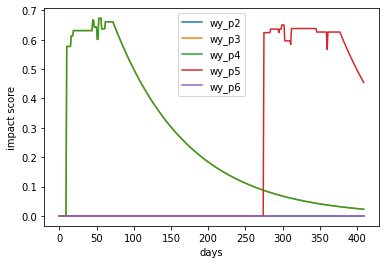

In [52]:
wy_data = pd.DataFrame(columns=["days",
                                       "wy_p2",
                                       "wy_p3",
                                       "wy_p4",
                                       "wy_p5",
                                       "wy_p6","wy_cases",
"%_change","target_conse_5"])
wy_data.days = data.days
wy_data.wy_cases = data.Wyoming
wy_p1 = the_day("03-13-20")#Emergency Issued   -> 03-04-2020 #mm-dd-YYYY
wy_p2 = the_day("")#Stay At home Policy -> 03-19-2020
wy_p3 = the_day(WY_rest) #Closing Restaurant and bars -> 03-19-2020 ->reopening -> 05-18-2020
wy_p4 = the_day(WY_buss) # Closing Businesses overnight -> 11-21-2020  -> opening 01-25-2021
wy_p5 = the_day("12-09-20") # Face Mask Mandate 06-18-2020 -> ended face mask -> 0
wy_p6 = the_day(WY_Q) # first vaccinationk

wy_p2_end = the_day(WY_stay_lift)  
wy_p3_end = the_day(WY_rest_lift)  
wy_p4_end = the_day(WY_buss_lift)  
wy_p5_end = the_day(WY_FM_lift)    
wy_p6_end = the_day(WY_travel_lift)


policy_day_list_wy = [wy_p1,wy_p2,wy_p3,wy_p4,wy_p5,wy_p6]
wy_data["mean_of_7"] = wy_data.wy_cases.rolling(7).mean()
wy_data["mean_of_7"].fillna(0,inplace=True)
percent_change(wy_data,state="wy")
policy_day_list_wy

# policy_difference(10, wy_p1, wy_data.days, wy_data,1, state="wy")
policy_difference(10, wy_p2, wy_p2_end, wy_data.days, wy_data,2, state="wy")
policy_difference(10, wy_p3, wy_p3_end, wy_data.days, wy_data,3, state="wy")
policy_difference(10, wy_p4, wy_p4_end, wy_data.days, wy_data,4, state="wy")
policy_difference(10, wy_p5, wy_p5_end, wy_data.days, wy_data,5, state="wy")
policy_difference(10, wy_p6, wy_p6_end, wy_data.days, wy_data,6, state="wy")
 
target_conse_5(wy_data["mean_of_7"],wy_data.target_conse_5)
wy_data.iloc[:,1:6].plot()
plt.xlabel("days")
plt.ylabel("impact score")
plt.show()


In [76]:
policy_day_list_wy = [wy_p2,wy_p3,wy_p4,wy_p5,wy_p6]
policy_day_list_wy_end = [wy_p2_end,wy_p3_end,wy_p4_end,wy_p5_end,wy_p6_end]
print(policy_day_list_wy)
print(policy_day_list_wy_end)


[0, 6, 6, 271, 0]
[0, 63, 63, 368, 56]


In [649]:
wy_data[:410]

,days,wy_p2,wy_p3,wy_p4,wy_p5,wy_p6,wy_cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,1,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,1,0.000000,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,0,-1.000000,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,8,inf,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,5,-0.375000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
405,406,0.0,0.023659,0.023659,0.473121,0.0,83,-0.126316,0,61.285714
406,407,0.0,0.023424,0.023424,0.468413,0.0,41,-0.506024,0,61.857143
407,408,0.0,0.023191,0.023191,0.463752,0.0,41,0.000000,0,62.428571
408,409,0.0,0.02296,0.02296,0.459138,0.0,40,-0.024390,0,62.857143


# Analysis

In [53]:
color_dict={'p2':'red',
            'p3':'blue',
            'p4':'yellow',
            'p5':'orange',
            'p6':'green'}

In [54]:
st = ['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'dc', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy']


In [652]:
sta = [al_data,ak_data,az_data,ar_data,ca_data,co_data,ct_data,de_data,dc_data,fl_data,ga_data,hi_data,id_data,il_data,in_data,ia_data,ks_data,ky_data,
        la_data,md_data,ma_data,mi_data,mn_data,ms_data,mo_data,mt_data,ne_data,nv_data,nh_data,nj_data,nm_data,ny_data,nd_data,oh_data,ok_data,or_data,
      pa_data,ri_data,sc_data,tn_data,tx_data,ut_data,vt_data,va_data,wa_data,wv_data,wi_data,wy_data]

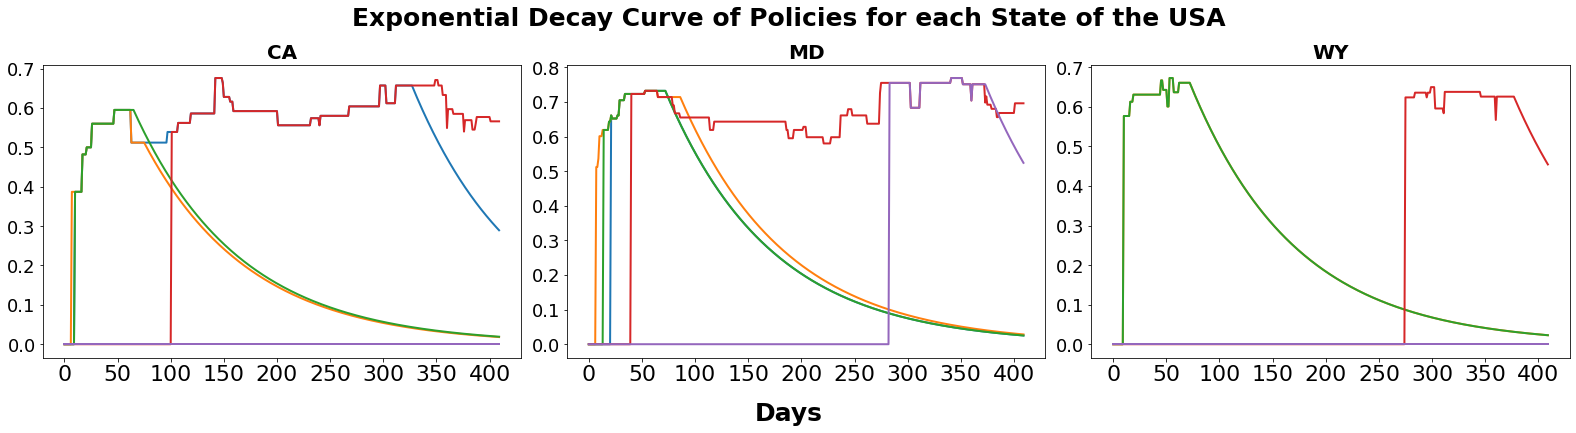

In [107]:
st3=[ca_data,md_data,wy_data]
# name = [x.upper() for x in list(bp.keys())]
name =["CA","MD","WY"]
fig,ax = plt.subplots(1,3,figsize=(22,6),constrained_layout=True)
fig.subplots_adjust(hspace=0.8, wspace=0.2)
s=0
for j in range(0,3):
    try:
        ax[j].plot(st3[s].iloc[:,1:6],linewidth=2)
        for tick in ax[j].xaxis.get_major_ticks():
            tick.label.set_fontsize(22)
            # tick.label.set_rotation(20)
        for tick in ax[j].yaxis.get_major_ticks():
            tick.label.set_fontsize(18)
        ax[j].set_title(f"{name[s]}",fontsize=20,fontweight = 'bold')
        s+=1
    except IndexError:
        continue
fig.supxlabel("Days",fontsize=25,fontweight = 'bold')
# fig.supylabel("Stringency Index",fontsize=25,fontweight = 'bold')
# plt.legend()
fig.suptitle("Exponential Decay Curve of Policies for each State of the USA",fontsize =25,fontweight = 'bold')
# ax[4,2].set_axis_off()
# ax[4,1].set_axis_off()

plt.tight_layout()
plt.show()
fig.savefig("testing_demo.png")

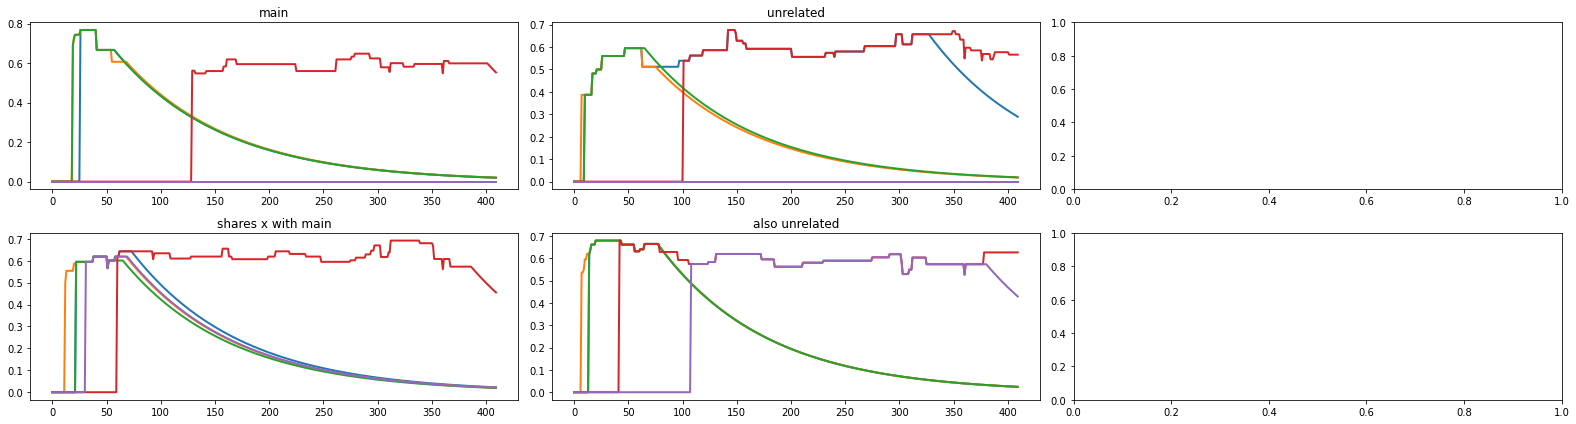

In [46]:
st3=[al_data,az_data,ca_data,ct_data,fl_data,hi_data]
# name = [x.upper() for x in list(bp.keys()]
name =["AL","AZ","CA","CT","FL","HI"]
fig,axs = plt.subplots(2,3,figsize=(22,6),constrained_layout=True)
axs[0, 0].plot(st3[0].iloc[:,1:6],linewidth=2)
axs[0, 0].set_title("main")
axs[1, 0].plot(st3[1].iloc[:,1:6],linewidth=2)
axs[1, 0].set_title("shares x with main")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(st3[2].iloc[:,1:6],linewidth=2)
axs[0, 1].set_title("unrelated")
axs[1, 1].plot(st3[3].iloc[:,1:6],linewidth=2)
axs[1, 1].set_title("also unrelated")
fig.tight_layout()

In [46]:
pwd

'c:\\Users\\lenovo\\OneDrive - Auburn University\\BDI Lab work\\Projects\\COVID-19 Project\\COVID-19 Project\\CODE'

In [654]:
# # First 18 state
# # st18=[al_data,ak_data,az_data,ar_data,ca_data,co_data,ct_data,de_data,dc_data,fl_data,ga_data,hi_data,id_data,il_data,in_data,ia_data,ks_data,ky_data]
# # st36 =[la_data,md_data,ma_data,mi_data,mn_data,ms_data,mo_data,mt_data,ne_data,nv_data,nh_data,nj_data,nm_data,ny_data,nd_data,oh_data,ok_data,or_data]
# st49 =[pa_data,ri_data,sc_data,tn_data,tx_data,ut_data,vt_data,va_data,wa_data,wv_data,wi_data,wy_data]
# name = [x.upper() for x in list(bp.keys())][36:]

# fig,ax = plt.subplots(5,3,figsize=(15,20))
# fig.subplots_adjust(hspace=0.8, wspace=0.2)
# s=0

# for i in range(0,5):
#     for j in range(0,3):
#         try:
#             ax[i][j].plot(st49[s].iloc[:,1:6],linewidth=2)
#             ax[i][j].set_title(f"{name[s]}",fontsize=20,fontweight = 'bold')
#             s+=1
#         except IndexError:
#             # continue pass
# fig.supxlabel("Days",fontsize=25,fontweight = 'bold')
# fig.supylabel("Exponential Decay",fontsize=25,fontweight = 'bold')
# # plt.legend()
# fig.suptitle("Exponential Decay Curve of Policies for each State of the USA",fontsize =25,fontweight = 'bold')
# ax[4,2].set_axis_off()
# ax[4,1].set_axis_off()

# plt.tight_layout(pad=2)

# plt.show()

In [69]:
pwd

'x:\\Push to bdi-server\\COVID-19 Project\\COVID-19 Project\\CODE'

No handles with labels found to put in legend.


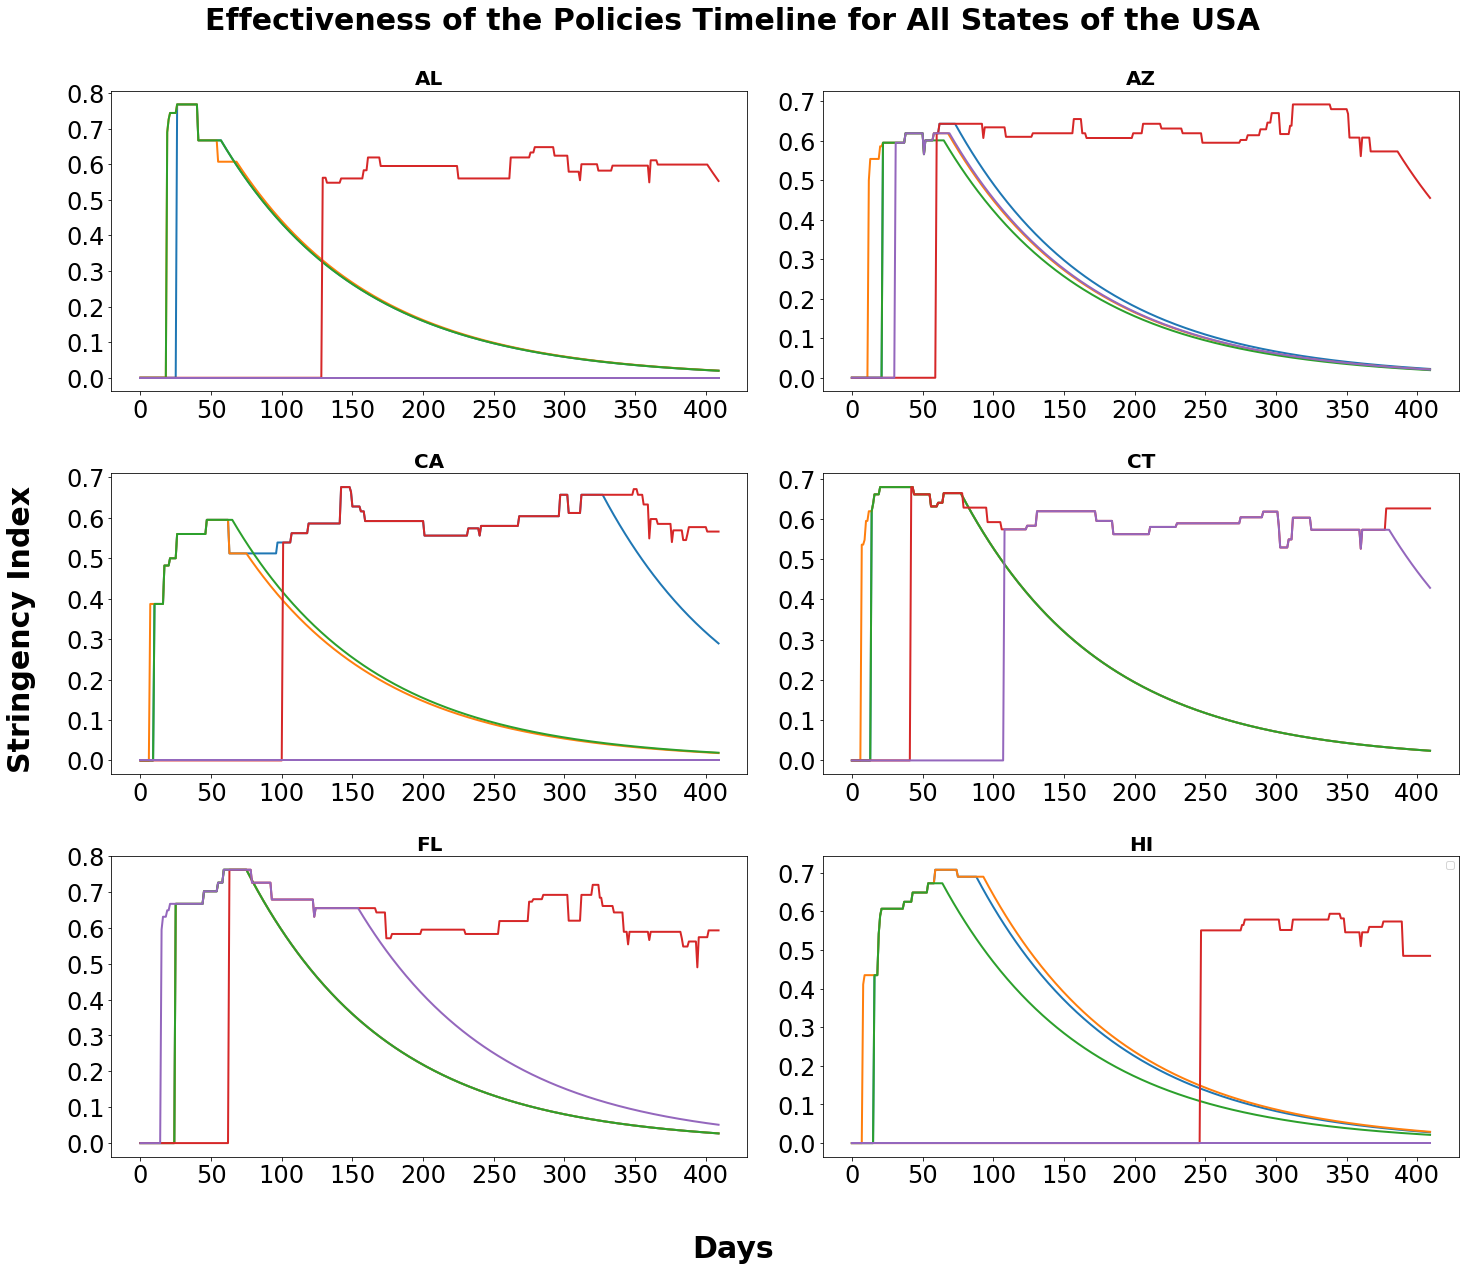

In [94]:
# PLOTTING ALL STATE EXPONENTIAL DECAY CURVE FOR ANALYSIS
# sta = [al_data,ak_data,az_data,ar_data,ca_data,co_data,ct_data,de_data,dc_data,fl_data,ga_data,hi_data,id_data,il_data,in_data,ia_data,ks_data,ky_data,
        # #   la_data,md_data,ma_data,mi_data,mn_data,ms_data,mo_data,mt_data,ne_data,nv_data,nh_data,nj_data,nm_data,ny_data,nd_data,oh_data,ok_data,or_data,
        #   pa_data,ri_data,sc_data,sd_data,tn_data,tx_data,ut_data,vt_data,va_data,wa_data,wv_data,wi_data,wy_data]
# name = [x.upper() for x in list(bp.keys())]
# 
fig,ax = plt.subplots(3,2,figsize=(21,18))
fig.subplots_adjust(hspace=0.8, wspace=0.2)
s=0

for i in range(0,3):
    for j in range(0,2):
        try:
            ax[i][j].plot(st3[s].iloc[:,1:6],linewidth=2)
            for tick in ax[i][j].xaxis.get_major_ticks():
                tick.label.set_fontsize(24)
            for tick in ax[i][j].yaxis.get_major_ticks():
                tick.label.set_fontsize(24) 
            ax[i][j].set_title(f"{name[s]}",fontsize=20,fontweight = 'bold')
            s+=1
        except IndexError:
            continue
fig.supxlabel("Days",fontsize=30,fontweight = 'bold')
fig.supylabel("Stringency Index",fontsize=30,fontweight = 'bold')
plt.legend()
fig.suptitle("Effectiveness of the Policies Timeline for All States of the USA",fontsize =30,fontweight = 'bold')
# ax[16,2].set_axis_off()
# ax[16,1].set_axis_off()
plt.tight_layout(pad=3)

plt.show()

fig.savefig("6state_index.png")

# Methods

## Data set prep

In [680]:
# x = wy_data[wy_data.target == 1].iloc[:,8:]
positive_data = al_data[:410][al_data.target_conse_5 == 1].iloc[:,1:]
negative_data = al_data[:410][al_data.target_conse_5 == 0].iloc[:,1:]

In [681]:
sta = [al_data,ak_data,az_data,ar_data,ca_data,co_data,ct_data,de_data,dc_data,fl_data,ga_data,hi_data,id_data,il_data,in_data,ia_data,ks_data,ky_data,
        la_data,md_data,ma_data,mi_data,mn_data,ms_data,mo_data,mt_data,ne_data,nv_data,nh_data,nj_data,nm_data,ny_data,nd_data,oh_data,ok_data,or_data,
        pa_data,ri_data,sc_data,tn_data,tx_data,ut_data,vt_data,va_data,wa_data,wv_data,wi_data,wy_data]
# print(sta)

In [682]:
al_data[:410]

,days,p2,p3,p4,p5,p6,cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,77,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,68,-0.116883,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,113,0.661765,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,124,0.097345,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,137,0.104839,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
405,406,0.020549,0.020875,0.020549,0.575513,0.0,398,0.010152,1,406.857143
406,407,0.020344,0.020667,0.020344,0.569786,0.0,280,-0.296482,0,407.000000
407,408,0.020142,0.020461,0.020142,0.564117,0.0,286,0.021429,0,401.714286
408,409,0.019941,0.020258,0.019941,0.558504,0.0,509,0.779720,0,394.714286


In [683]:
x='mo'
new_order = ["days","p2","p3","p4","p5","p6","targer_conse_5","cases","%_change","mean_of_7"]
# al_data.reindex(new_order,axis=1)
mo_data[:410].rename(columns={f"{x}_p2":"p2",f"{x}_p3":"p3",f"{x}_p4":"p4",f"{x}_p5":"p5",f"{x}p6":"p6",f"{x}_cases":"cases"})


,days,p2,p3,p4,p5,p6,cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,11,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,11,0.000000,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,28,1.545455,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,45,0.607143,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,55,0.222222,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
405,406,0.019848,0.019848,0.019848,0.0,0.0,716,-0.193694,0,2073.000000
406,407,0.019651,0.019651,0.019651,0.0,0.0,379,-0.470670,0,578.714286
407,408,0.019455,0.019455,0.019455,0.0,0.0,316,-0.166227,0,560.571429
408,409,0.019261,0.019261,0.019261,0.0,0.0,524,0.658228,0,635.428571


In [684]:
for i in range(len(st)):
    sta[i].rename(columns={f"{st[i]}_p2":"p2",f"{st[i]}_p3":"p3",f"{st[i]}_p4":"p4",f"{st[i]}_p5":"p5",f"{st[i]}_p6":"p6",f"{st[i]}_cases":"cases"},inplace=True)
    

KeyError: 0

In [685]:
positive_data.head(10)

,p2,p3,p4,p5,p6,cases,%_change,target_conse_5,mean_of_7
29,0.768,0.768,0.768,0.0,0.0,113,-0.066116,1,195.000000
30,0.768,0.768,0.768,0.0,0.0,260,1.300885,1,189.285714
31,0.768,0.768,0.768,0.0,0.0,176,-0.323077,1,180.428571
32,0.768,0.768,0.768,0.0,0.0,165,-0.062500,1,175.000000
123,0.34474,0.350209,0.34474,0.0,0.0,2326,-0.044764,1,2012.285714
124,0.34131,0.346724,0.34131,0.0,0.0,2241,-0.036543,1,1996.571429
125,0.337914,0.343274,0.337914,0.0,0.0,1986,-0.113788,1,1931.142857
132,0.315068,0.320067,0.315068,0.548,0.0,1535,-0.187831,1,1771.857143
133,0.311934,0.316882,0.311934,0.548,0.0,937,-0.389577,1,1748.142857
134,0.30883,0.313729,0.30883,0.548,0.0,809,-0.136606,1,1731.428571


In [686]:
negative_data.iloc[:,:8]

,p2,p3,p4,p5,p6,cases,%_change,target_conse_5
0,0.0,0.0,0.0,0.0,0.0,77,0.000000,0
1,0.0,0.0,0.0,0.0,0.0,68,-0.116883,0
2,0.0,0.0,0.0,0.0,0.0,113,0.661765,0
3,0.0,0.0,0.0,0.0,0.0,124,0.097345,0
4,0.0,0.0,0.0,0.0,0.0,137,0.104839,0
...,...,...,...,...,...,...,...,...
403,0.020964,0.021296,0.020964,0.587139,0.0,433,-0.064795,0
406,0.020344,0.020667,0.020344,0.569786,0.0,280,-0.296482,0
407,0.020142,0.020461,0.020142,0.564117,0.0,286,0.021429,0
408,0.019941,0.020258,0.019941,0.558504,0.0,509,0.779720,0


In [687]:
states = [al_data,
          ak_data,az_data,ar_data,ca_data,co_data,ct_data,de_data,dc_data,fl_data,ga_data,hi_data,id_data,il_data,in_data,ia_data,ks_data,ky_data,
          la_data,md_data,ma_data,mi_data,mn_data,ms_data,mo_data,mt_data,ne_data,nv_data,nh_data,nj_data,nm_data,ny_data,nd_data,oh_data,ok_data,or_data,
          pa_data,ri_data,sc_data,tn_data,tx_data,ut_data,vt_data,va_data,wa_data,wv_data,wi_data,wy_data]
for i in sta:
    positive_data = positive_data.append(i[:410][i.target_conse_5 == 1].iloc[:,1:],ignore_index=True)
    negative_data = negative_data.append(i[:410][i.target_conse_5 == 0].iloc[:,1:],ignore_index=True)
print(len(positive_data),len(negative_data))


3032 17058


In [664]:
# REMOVING ALL THE NULL ENTIRIES
# before 300 -> +ve data =>4616 & -ve data => 22824
positive_data = positive_data.loc[~(positive_data.iloc[:,:6]==0).all(axis=1)] # FROM 4616 to 1443
negative_data = negative_data.loc[~(negative_data.iloc[:,:6]==0).all(axis=1)] # FROM 22824 TO 13255
print(len(positive_data),len(negative_data))

3032 17058


In [692]:
al_data[:410]

,days,p2,p3,p4,p5,p6,cases,%_change,target_conse_5,mean_of_7
0,1,0.0,0.0,0.0,0.0,0.0,77,0.000000,0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,68,-0.116883,0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,113,0.661765,0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,124,0.097345,0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,137,0.104839,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
405,406,0.020549,0.020875,0.020549,0.575513,0.0,398,0.010152,1,406.857143
406,407,0.020344,0.020667,0.020344,0.569786,0.0,280,-0.296482,0,407.000000
407,408,0.020142,0.020461,0.020142,0.564117,0.0,286,0.021429,0,401.714286
408,409,0.019941,0.020258,0.019941,0.558504,0.0,509,0.779720,0,394.714286


In [782]:
len(states)*410

19680

In [693]:
combine_data=al_data[:410]
for st in states[1:]:
    combine_data = combine_data.append(st[:410],ignore_index=True)

In [694]:
combine_data
# problem : change the heading of all the states to one common name.

,days,p2,p3,p4,p5,p6,cases,%_change,target_conse_5,mean_of_7,target_with_PELT,target_conse_3_policy
0,1,0.0,0.0,0.0,0.0,0.0,77,0.000000,0,0.000000,NaN,NaN
1,2,0.0,0.0,0.0,0.0,0.0,68,-0.116883,0,0.000000,NaN,NaN
2,3,0.0,0.0,0.0,0.0,0.0,113,0.661765,0,0.000000,NaN,NaN
3,4,0.0,0.0,0.0,0.0,0.0,124,0.097345,0,0.000000,NaN,NaN
4,5,0.0,0.0,0.0,0.0,0.0,137,0.104839,0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19675,406,0.0,0.023659,0.023659,0.473121,0.0,83,-0.126316,0,61.285714,NaN,NaN
19676,407,0.0,0.023424,0.023424,0.468413,0.0,41,-0.506024,0,61.857143,NaN,NaN
19677,408,0.0,0.023191,0.023191,0.463752,0.0,41,0.000000,0,62.428571,NaN,NaN
19678,409,0.0,0.02296,0.02296,0.459138,0.0,40,-0.024390,0,62.857143,NaN,NaN


In [695]:
combine_data.to_csv("State_combine_data_new_2.csv")

## Combining +ve and -ve dataset

In [696]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

In [780]:
positive_data.sample(10)

,p2,p3,p4,p5,p6,cases,%_change,target_conse_5,mean_of_7,target_with_PELT,target_conse_3_policy
1563,0.0,0.655,0.0,0.0,0.0,218,-0.255973,1,214.285714,NaN,NaN
1208,0.349247,0.391852,0.349247,0.643,0.0,775,-0.032459,1,745.142857,NaN,NaN
2451,0.022199,0.022948,0.022199,0.548,0.548,322,-0.141333,1,328.428571,NaN,NaN
615,0.75,0.75,0.75,0.0,0.0,46,-0.465116,1,92.142857,NaN,NaN
2600,0.027913,0.031525,0.031525,0.0,0.0,961,0.240000,1,1517.285714,NaN,NaN
2489,0.179835,0.179835,0.151298,0.696,0.179835,839,0.111258,1,740.714286,NaN,NaN
1940,0.064024,0.073645,0.064024,0.626,0.626,491,-0.215655,1,776.142857,NaN,NaN
1773,0.081937,0.081937,0.081937,0.779,0.0,868,-0.532328,1,1784.714286,NaN,NaN
1353,0.714,0.714,0.714,0.714,0.0,308,-0.268409,1,743.000000,NaN,NaN
2164,0.054684,0.050404,0.05048,0.73,0.0,2306,0.010517,1,2136.142857,NaN,NaN


In [698]:
negative_data

,p2,p3,p4,p5,p6,cases,%_change,target_conse_5,mean_of_7,target_with_PELT,target_conse_3_policy
0,0.0,0.0,0.0,0.0,0.0,77,0.000000,0,0.000000,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,68,-0.116883,0,0.000000,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,113,0.661765,0,0.000000,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,124,0.097345,0,0.000000,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,137,0.104839,0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17053,0.0,0.023659,0.023659,0.473121,0.0,83,-0.126316,0,61.285714,NaN,NaN
17054,0.0,0.023424,0.023424,0.468413,0.0,41,-0.506024,0,61.857143,NaN,NaN
17055,0.0,0.023191,0.023191,0.463752,0.0,41,0.000000,0,62.428571,NaN,NaN
17056,0.0,0.02296,0.02296,0.459138,0.0,40,-0.024390,0,62.857143,NaN,NaN


In [699]:
import random
random.seed(0)

In [749]:

x = positive_data.iloc[:,:]
negative_data_ = shuffle(negative_data,random_state=0)
x_3200 = negative_data_.iloc[:,:].sample(3200)
x = x.append(x_3200,ignore_index=True)
x = shuffle(x,random_state=0)
x.shape

X = x.iloc[:,:5]
y = x.target_conse_5.astype(int)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


In [750]:
x_train

,p2,p3,p4,p5,p6
229,0.162431,0.162431,0.162431,0.358196,0.0
5334,0.404063,0.372439,0.372998,0.708,0.0
5267,0.75,0.75,0.75,0.0,0.0
1393,0.107865,0.115686,0.11115,0.338538,0.0
2548,0.234885,0.26528,0.26528,0.0,0.0
...,...,...,...,...,...
5601,0.714,0.714,0.714,0.0,0.0
6218,0.634,0.634,0.634,0.0,0.0
1067,0.0,0.081895,0.081895,0.764,0.0
382,0.592,0.204042,0.214554,0.592,0.0


## Logistic Regression

In [676]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

In [715]:
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)
model_prob= model.predict_proba(x_test)
pred_lr = model.predict(x_test)
cm = confusion_matrix(y_test, pred_lr)

# fig, ax = plt.subplots()
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
    # for j in range(2):
        # ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

In [716]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.58      0.09      0.15       490
           1       0.66      0.97      0.79       915

    accuracy                           0.66      1405
   macro avg       0.62      0.53      0.47      1405
weighted avg       0.64      0.66      0.56      1405



In [717]:
model.coef_

array([[ 1.50202693, -2.61292951,  0.65092262,  0.82625073, -0.57287502]])

Text(0.5, 1.0, ' LR Policy Impact')

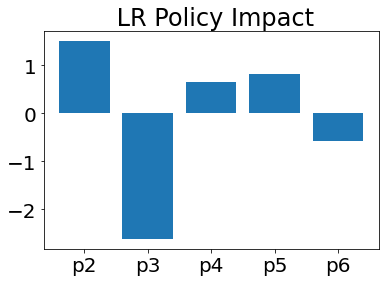

In [718]:
plt.bar([x for x in x.columns[:5]],model.coef_[0])
# plt.ylim(0.14)
plt.title(" LR Policy Impact")

## Nonlinear SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
deg = [1,2,3]
for i in deg:
    m = svm.SVC(kernel='poly',degree=i)
    m.fit(x_train,y_train)

    predictions_poly = m.predict(x_test)
    accuracy_poly = accuracy_score(y_test, predictions_poly)
    print(f"{i} degree polynomial Kernel Accuracy (normalized): " + str(accuracy_poly))

1 degree polynomial Kernel Accuracy (normalized): 0.6299045599151644
2 degree polynomial Kernel Accuracy (normalized): 0.6267232237539767
3 degree polynomial Kernel Accuracy (normalized): 0.6076352067868505


In [ ]:
m = svm.SVC(kernel="linear")
m.fit(x_train,y_train)
predictions_poly = m.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print(f"{i} degree polynomial Kernel Accuracy (normalized): " + str(accuracy_poly))

3 degree polynomial Kernel Accuracy (normalized): 0.6299045599151644


<BarContainer object of 5 artists>

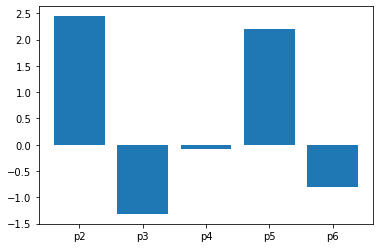

In [ ]:
plt.bar([x for x in x.columns[:5]],m.coef_[0])

## Random Forest

CM: [[318 172]
 [ 68 847]]
              precision    recall  f1-score   support

           0       0.82      0.65      0.73       490
           1       0.83      0.93      0.88       915

    accuracy                           0.83      1405
   macro avg       0.83      0.79      0.80      1405
weighted avg       0.83      0.83      0.82      1405

RF feature importance:  [0.22505228 0.25921301 0.255499   0.17343533 0.08680038]


Text(0.5, 1.0, 'RF Policy Impact')

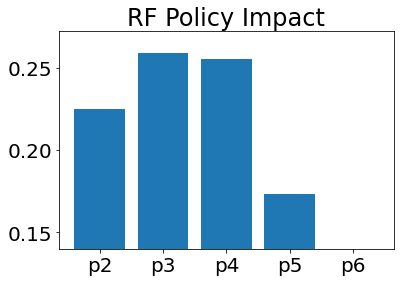

In [719]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# x = positive_data
# negative_data = shuffle(negative_data)
# x_7000 = negative_data.sample(7000)
# x = x.append(x_7000,ignore_index=True)
# x = shuffle(x)
# X = x.iloc[:,:6]
# y_rf = x.target_conse_3.astype(int)


clf = RandomForestClassifier(n_estimators = 100,criterion='entropy',n_jobs=-1, oob_score=True,random_state = 0).fit(x_train, y_train)

y_pred=clf.predict(x_test)
y_prob = clf.predict_proba(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("CM:",cm)
print(classification_report(y_test, y_pred))
print("RF feature importance: ",clf.feature_importances_)


plt.bar(x.columns[:5],clf.feature_importances_)
plt.ylim(0.14)
plt.title("RF Policy Impact")



In [720]:
clf.get_params(),clf.oob_score_

({'bootstrap': True,
  'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 'auto',
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_impurity_split': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 100,
  'n_jobs': -1,
  'oob_score': True,
  'random_state': 0,
  'verbose': 0,
  'warm_start': False},
 0.8135489777235276)

## Gradient Boosting

In [721]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

              precision    recall  f1-score   support

           0       0.71      0.46      0.56       490
           1       0.76      0.90      0.82       915

    accuracy                           0.75      1405
   macro avg       0.73      0.68      0.69      1405
weighted avg       0.74      0.75      0.73      1405

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


Text(0.5, 1.0, 'GBC Policy Impact')

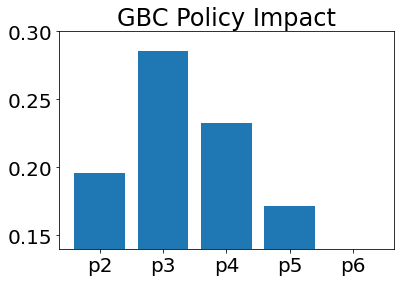

In [722]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc= gbc.predict(x_test)
print(classification_report(y_test,pred_gbc))
print(gbc.get_params())

plt.bar(x.columns[:5],gbc.feature_importances_)
plt.ylim(0.14)
plt.title("GBC Policy Impact")

# HyperParameter Testing

In [723]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [724]:
# parameters
max_depth = [3,5, 8, 15, 25, 30]
n_estimators2 = [1,10,25,50,75,100,200,300,400,500,600,800,1000,1200]


## GB

In [751]:
gb= GradientBoostingClassifier(random_state=0)
hyperF = dict(n_estimators = n_estimators2, max_depth = max_depth) 
            
             
gridF_gb = GridSearchCV(gb, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1,return_train_score=True,
                      scoring=scoring,refit="AUC")
bestF_gb = gridF_gb.fit(x_train, y_train)
 


Fitting 3 folds for each of 84 candidates, totalling 252 fits


In [756]:
gridF_gb.best_estimator_

GradientBoostingClassifier(max_depth=15, n_estimators=1000, random_state=0)

In [757]:
gb_df=pd.DataFrame(bestF_gb.cv_results_)
gb_df=gb_df.sort_values('rank_test_AUC')
gb_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,...,split1_test_Accuracy,split2_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,split0_train_Accuracy,split1_train_Accuracy,split2_train_Accuracy,mean_train_Accuracy,std_train_Accuracy
54,59.338048,0.567564,0.390913,0.011009,15,1000,"{'max_depth': 15, 'n_estimators': 1000}",0.870506,0.873509,0.865532,...,0.801238,0.789546,0.799633,0.007665,2,0.981431,0.979367,0.980743,0.980514,0.000858
53,48.998775,0.605049,0.299812,0.016182,15,800,"{'max_depth': 15, 'n_estimators': 800}",0.869509,0.873371,0.865463,...,0.796424,0.788858,0.797111,0.007036,3,0.981431,0.979367,0.980743,0.980514,0.000858
55,70.478888,0.484795,0.483066,0.019763,15,1200,"{'max_depth': 15, 'n_estimators': 1200}",0.869467,0.872688,0.864763,...,0.803301,0.789546,0.801009,0.008578,1,0.981431,0.979367,0.980743,0.980514,0.000858
51,31.967112,0.802734,0.232389,0.013290,15,500,"{'max_depth': 15, 'n_estimators': 500}",0.867114,0.870513,0.868384,...,0.795048,0.786795,0.793673,0.005147,8,0.981431,0.979367,0.980743,0.980514,0.000858
52,37.791616,0.461712,0.235601,0.014726,15,600,"{'max_depth': 15, 'n_estimators': 600}",0.867124,0.871081,0.867320,...,0.795048,0.789546,0.796424,0.006253,4,0.981431,0.979367,0.980743,0.980514,0.000858


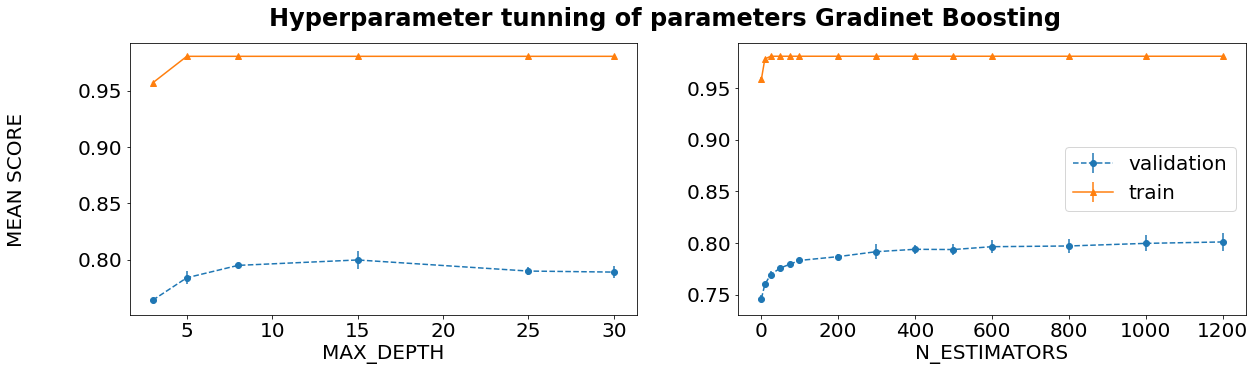

In [759]:
def plot_search_results(grid,model):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_Accuracy']
    stds_test = results['std_test_Accuracy']
    means_train = results['mean_train_Accuracy']
    stds_train = results['std_train_Accuracy']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none',figsize=(20,5))
    fig.suptitle(f'Hyperparameter tunning of parameters {model} ',weight='bold')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='validation')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()
plot_search_results(bestF_gb,'Gradinet Boosting')

# RF

In [760]:
rf= RandomForestClassifier(random_state=0)
hyperF = dict(n_estimators = n_estimators2, max_depth = max_depth) 
            
             
gridF_rf = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1,return_train_score=True,
scoring=scoring,refit="AUC")
bestF_rf = gridF_rf.fit(x_train, y_train)
 


Fitting 3 folds for each of 84 candidates, totalling 252 fits


In [761]:
gridF_rf.best_estimator_

RandomForestClassifier(max_depth=25, n_estimators=300, random_state=0)

In [762]:
rf_df = pd.DataFrame(bestF_rf.cv_results_).sort_values('rank_test_AUC')
rf_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,...,split1_test_Accuracy,split2_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,split0_train_Accuracy,split1_train_Accuracy,split2_train_Accuracy,mean_train_Accuracy,std_train_Accuracy
63,4.007897,0.164591,0.567793,0.043442,25,300,"{'max_depth': 25, 'n_estimators': 300}",0.872646,0.874389,0.876619,...,0.801238,0.806740,0.803989,0.002246,3,0.981431,0.979367,0.980743,0.980514,0.000858
62,2.666600,0.239899,0.426832,0.046817,25,200,"{'max_depth': 25, 'n_estimators': 200}",0.872377,0.874182,0.876635,...,0.801238,0.808116,0.804218,0.002882,2,0.981431,0.979367,0.980743,0.980514,0.000858
77,3.724546,0.040543,0.543869,0.061849,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.872412,0.874002,0.876746,...,0.799862,0.806740,0.803530,0.002826,4,0.981431,0.979367,0.980743,0.980514,0.000858
61,1.254691,0.072216,0.173326,0.004400,25,100,"{'max_depth': 25, 'n_estimators': 100}",0.872218,0.874371,0.876340,...,0.800550,0.803301,0.800779,0.001972,20,0.981431,0.979367,0.980743,0.980514,0.000858
76,2.401616,0.099711,0.349937,0.024589,30,200,"{'max_depth': 30, 'n_estimators': 200}",0.872207,0.873838,0.876818,...,0.801926,0.810179,0.804906,0.003739,1,0.981431,0.979367,0.980743,0.980514,0.000858


In [763]:
rf_df.to_csv("rf_cv_new_3.csv")
gb_df.to_csv("gb_cv_new_3.csv")

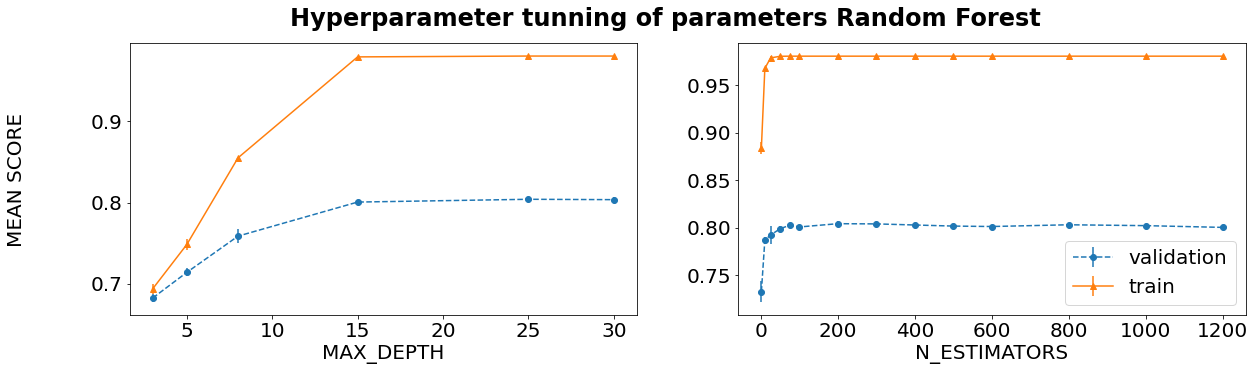

In [764]:
plot_search_results(bestF_rf,'Random Forest')

In [765]:
bestF_rf.best_estimator_,bestF_gb.best_estimator_

(RandomForestClassifier(max_depth=25, n_estimators=300, random_state=0),
 GradientBoostingClassifier(max_depth=15, n_estimators=1000, random_state=0))

In [768]:
rf_new= RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=25)
rf_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=300)

In [769]:
rf_new.feature_importances_

array([0.22076113, 0.25715806, 0.25806681, 0.17685803, 0.08715597])

In [770]:
rf_y_pred=rf_new.predict(x_test)

In [771]:
print(classification_report(rf_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       880
           1       0.84      0.76      0.79       990

    accuracy                           0.79      1870
   macro avg       0.79      0.79      0.79      1870
weighted avg       0.80      0.79      0.79      1870



In [772]:
gb_new = GradientBoostingClassifier(n_estimators=1000,max_depth=15)
gb_new.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=15, n_estimators=1000)

In [773]:
gb_new.feature_importances_

array([0.20662415, 0.28510733, 0.21638292, 0.19848551, 0.09340009])

In [774]:
gb_y_pred= gb_new.predict(x_test)

In [775]:
print(classification_report(gb_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       895
           1       0.84      0.77      0.80       975

    accuracy                           0.80      1870
   macro avg       0.81      0.81      0.80      1870
weighted avg       0.81      0.80      0.80      1870



In [744]:
policy=["Stay_Home",'Cls_Rest',"Cls_Buss.","FaceMask",'Trav_Quar_Ban']

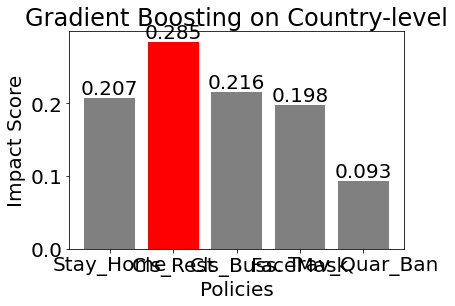

In [776]:
ax2=plt.bar(policy,[round(x,3) for x in gb_new.feature_importances_],color = ['gray' if (x != max(gb_new.feature_importances_)) else 'red' for x in gb_new.feature_importances_])
plt.bar_label(ax2)
plt.xlabel("Policies")
plt.ylabel("Impact Score")
plt.title("Gradient Boosting on Country-level")
plt.show()

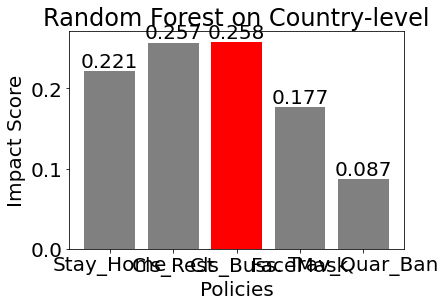

In [777]:
ax1=plt.bar(policy,[round(x,3) for x in rf_new.feature_importances_],color = ['gray' if (x != max(rf_new.feature_importances_)) else 'red' for x in rf_new.feature_importances_])
plt.bar_label(ax1)
plt.xlabel("Policies")
plt.ylabel("Impact Score")
plt.title("Random Forest on Country-level")
plt.show()

In [ ]:
# with open('feature_importance.txt','w') as file:
    # file.write(f'gradient boosting : {gb_new.feature_importances_}')
    # file.write('\n')
    # file.write(f'random forest : {rf_new.feature_importances_}')
    # 

In [778]:
gb_new.feature_importances_,rf_new.feature_importances_

(array([0.20662415, 0.28510733, 0.21638292, 0.19848551, 0.09340009]),
 array([0.22076113, 0.25715806, 0.25806681, 0.17685803, 0.08715597]))

Text(0.5, 0.01, ' Policies')

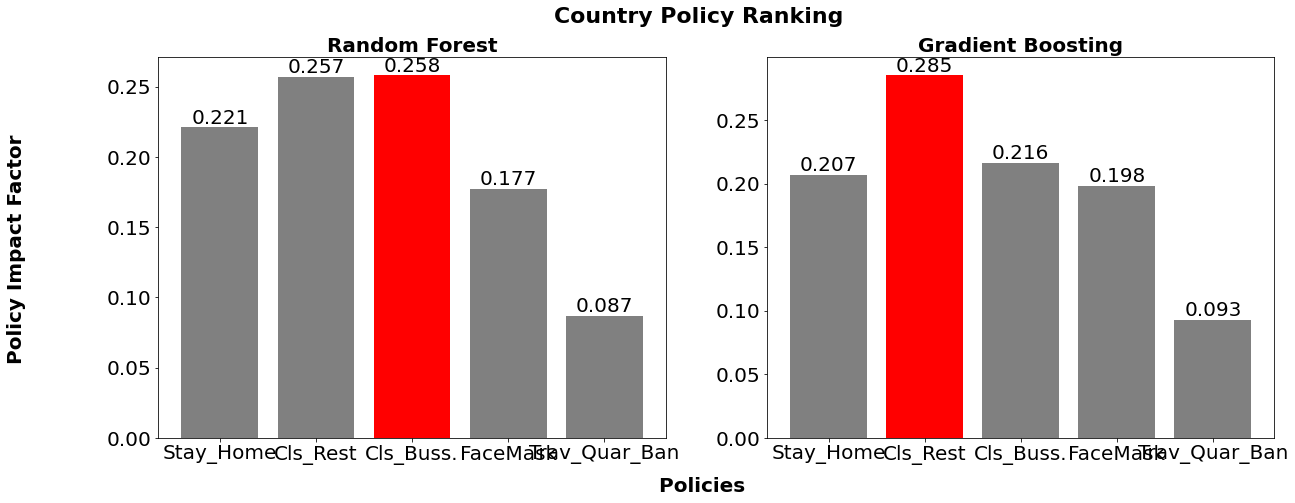

In [779]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

fig,ax = plt.subplots(1,2,figsize=(20,7))
fig.suptitle("Country Policy Ranking",fontsize=22,weight='bold')
ax0=ax[0].bar(policy,[round(x,3) for x in rf_new.feature_importances_],color = ['gray' if (x != max(rf_new.feature_importances_)) else 'red' for x in rf_new.feature_importances_])
ax[0].bar_label(ax0)
ax[0].set_title("Random Forest",fontsize=20,weight='bold')
# ax[0].set_ylim(0.14)
ax1=ax[1].bar(policy,[round(x,3) for x in gb_new.feature_importances_],color = ['gray' if (x != max(gb_new.feature_importances_)) else 'red' for x in gb_new.feature_importances_])
ax[1].bar_label(ax1)
ax[1].set_title("Gradient Boosting",fontsize=20,weight='bold')
# ax[1].set_ylim(0.14)
fig.supylabel("Policy Impact Factor",fontsize=20,weight='bold')
fig.supxlabel(" Policies",fontsize=20,weight='bold')
